# Obligatorio de Analisis Predictivo de Series Temporales

## Estudio de Emisiones de CO2 mundial y particularmente en Brasil

## Estudiantes:
    José Diaz (230253)
    Juan Diego Mattos (262316)
    Matias Mendez (140709)

El objetivo de este obligatorio es estudiar en profundidad la serie de Emisiones de CO2 en kt (Obtenida en: https://datos.bancomundial.org/indicador/EN.ATM.CO2E.KT?view=chart) en el mundo. Luego, utilizando particularmente la serie en brasil, investigar si hay alguna correlacion con los incendios en el amazonas (datos obtenidos en https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil).

## Librerias y Configuración Inicial

Para el obligatorio se utilizaron las librerias astsa, tidyverse y forecast.

In [1]:
#install.packages('astsa')
#install.packages('tidyverse')
#install.packages('forecast')
#install.packages("devtools")     # only need to do this once
#devtools::install_github("nickpoison/astsa")

library('astsa')
library('tidyverse', warn.conflicts = FALSE)
library('forecast', warn.conflicts = FALSE)

#ajusto tamaño de gráficas y quito notacion cientifica de las graficas
options(repr.plot.width=8, repr.plot.height=5)
options(scipen=999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Ingesta de datos

Se obtuvieron los datos guardados en /data/co2_data.csv, se eliminaron algunos datos vacios y se crearon 2 dataframes, para el mundo y particularmente para Brasil.

In [2]:
co2_data = read.csv2('./data/co2_data.csv', header = TRUE, sep = ',', dec = '.')
head(co2_data) # Primeros valores del dataframe

Country.Name,Country.Code,Indicator.Name,Indicator.Code,X1960,X1961,X1962,X1963,X1964,X1965,⋯,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
Aruba,ABW,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
,AFE,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,118545.901,123758.903,128093.898,132810.333,144345.352,155803.780,⋯,559333.9,580510.9,601860.2,586385,592299.6,601323.4,600351.1,NA,NA,NA
Afganistán,AFG,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,⋯,10450.0,8510.0,7810.0,7990,7390.0,7380.0,7440.0,NA,NA,NA
,AFW,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,8760.463,9376.519,9710.216,11540.049,13985.938,19827.469,⋯,181740.0,191990.0,198440.0,193060,195120.0,201900.0,224380.0,NA,NA,NA
Angola,AGO,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,⋯,30250.0,32820.0,34630.0,35160,35410.0,30840.0,27340.0,NA,NA,NA
Albania,ALB,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,⋯,4580.0,4790.0,5220.0,5070,4930.0,5600.0,5560.0,NA,NA,NA


### CO2 en el mundo

In [3]:
world_data = co2_data %>% filter(co2_data$Country.Name =='Mundo') # Obtener la fila 'Mundo'
world_data = world_data %>% select(c(5:length(world_data))) # Quitar los valores: Name, Code, Indicator, Indicator Code

# Eliminar los valores nan:
world_data["X2019"]=NULL
world_data["X2020"]=NULL
world_data["X"]=NULL

head(world_data) # Datos del mundo de CO2 de 1960 a 2018

X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,⋯,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9463838,9423934,9732506,10274504,10820253,11402575,11988321,12413352,13087347,13976006,⋯,29253758,31031799,32004028,32444192,33053847,33085192,32943428,32940650,33351608,34041046


### Particularmente en Brasil

In [4]:
br_data = co2_data %>% filter(co2_data$Country.Name =='Brasil') # Obtener la fila 'Brasil'
br_data = br_data %>% select(c(5:length(br_data))) # Quitar los valores: Name, Code, Indicator, Indicator Code

# Eliminar los valores nan:
br_data["X2019"]=NULL
br_data["X2020"]=NULL
br_data["X"]=NULL

head(br_data) # Datos de Brasil de CO2 de 1960 a 2018

X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,⋯,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46908.26,49203.81,53695.88,55617.39,56735.82,56398.46,64304.51,66193.02,77421.37,84315.33,⋯,350830,397730,417120,451760,482860,506780,479970,441910,449840,427710


## Análisis Exploratorio

### Transformar los datos a time series

Lo primero fue transformar los dataframes en Time Series para estudiarlas en profundidad.

Las series arrancan en 1960 y tienen un muestreo anual (por lo tanto, frecuencia 1).

In [5]:
full_world_ts = ts(as.numeric(world_data), start = 1960, frequency = 1)

full_br_ts = ts(as.numeric(br_data), start = 1960, frequency = 1)

### Train - Test Split

Para tener un elemento mas a la hora de elegir que modelo se ajusta mejor a la serie en estudio, procedemos a hacer un split en train y test. En train vamos a ajustar los modelos y vamos a validar en test.

- train : 1960 a 2010
- test : 2011 a 2018

In [6]:
world_ts = head(full_world_ts, 51)

br_ts = head(full_br_ts, 51)

### Graficar las time series

Lo primero que hay que hacer en un analisis exploratorio es graficar las series y observar a ojo el comportamiento de las mismas.

En azul estan los datos de train y en rojo los datos de test.

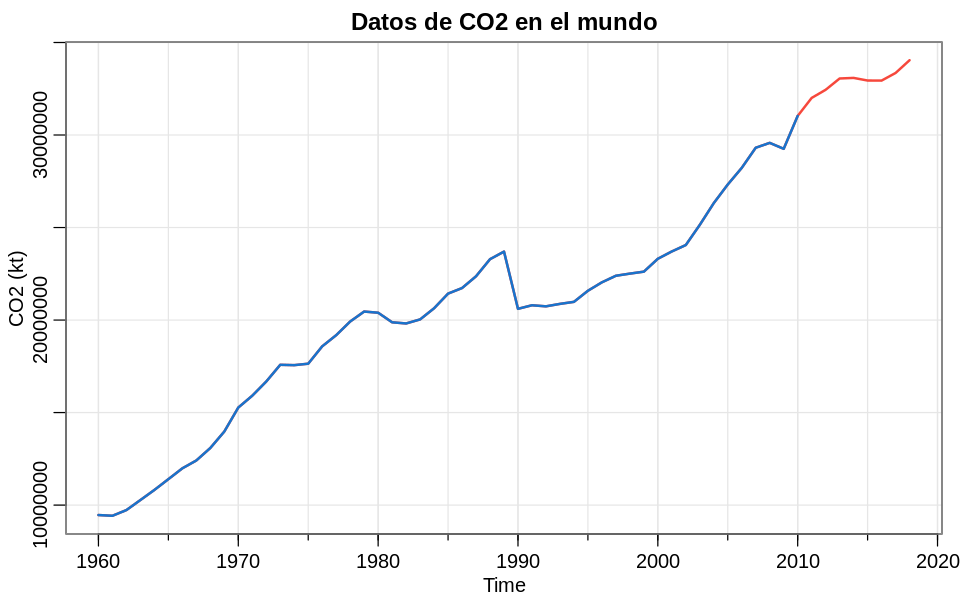

In [7]:
tsplot(full_world_ts, lw = 2, col = 2, main='Datos de CO2 en el mundo', ylab='CO2 (kt)')
lines(world_ts, col = 4, lw = 2)

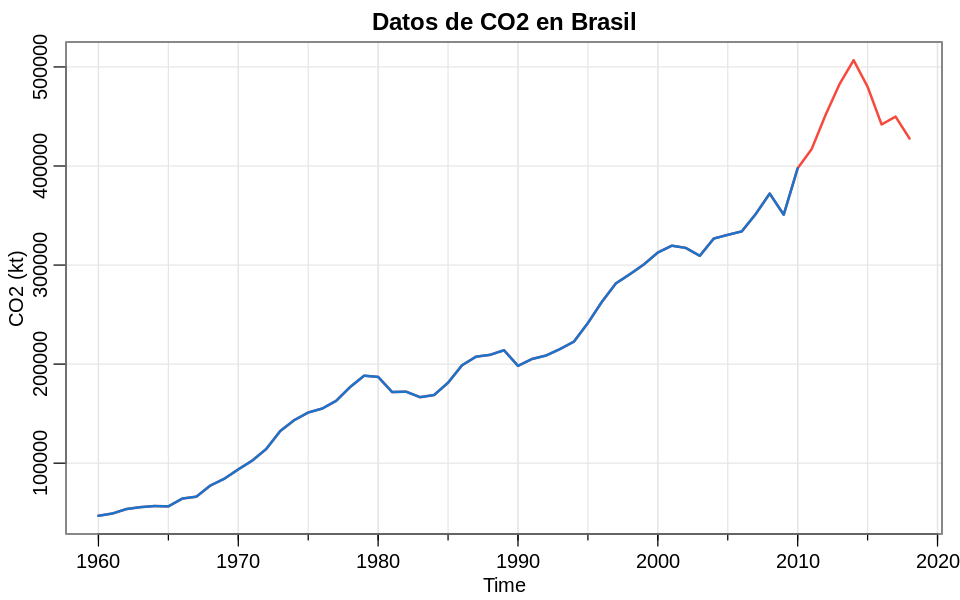

In [8]:
tsplot(full_br_ts, lw = 2, col = 2, main='Datos de CO2 en Brasil', ylab='CO2 (kt)')
lines(br_ts, col = 4, lw = 2)

### Autocorrelaciones y Autocorrelaciones Parciales

Viendo las graficas es claro que no es un fenomeno estacionario. Hay una clara tendencia creciente. Esto se puede confirmar observando por ejemplo la función de autocorrelación. 

Tambien observando la función de autocorrelación parcial y contrastandola con la acf podemos empezar a hacer conjeturas sobre el posible orden de arma pero primero debemos quitar la tendencia.

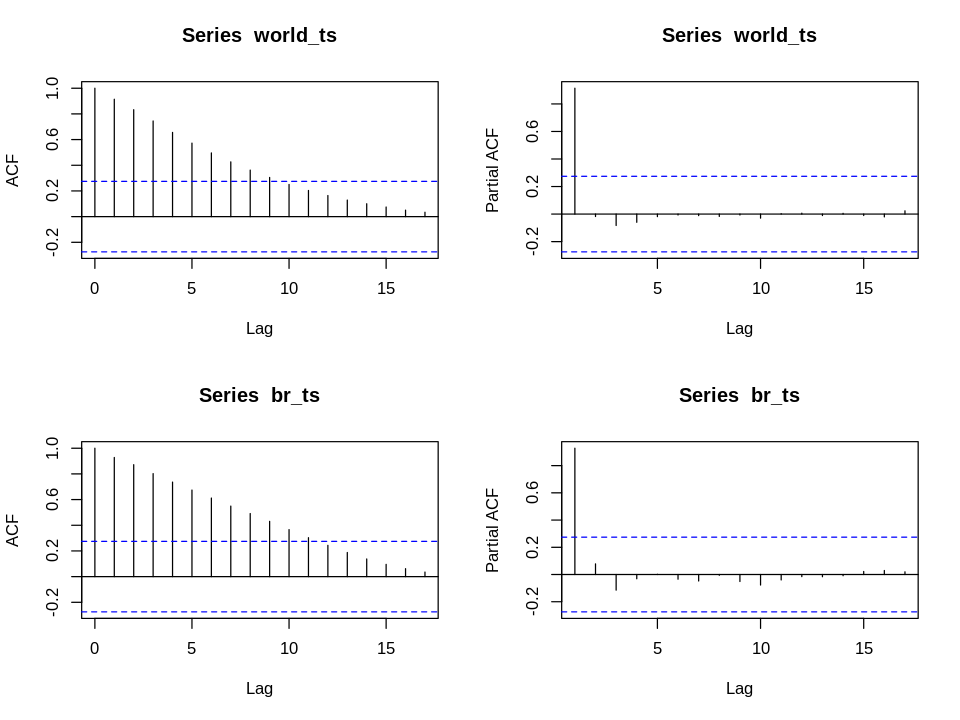

In [9]:
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2,2))
acf(world_ts)
pacf(world_ts)
acf(br_ts)
pacf(br_ts)

## Modelos

A continuación se detallan distintos modelos utilizados para ajustar la serie de CO2 mundial.

### Modelo 1

Primero ajustamos una tendencia lineal:

#### Ajuste lineal

In [10]:
t = time(world_ts) - 1960
fit_line_world = lm(world_ts~t)
summary(fit_line_world)


Call:
lm(formula = world_ts ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-2305613 -1752700   269914  1469787  2651221 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 11051342     464030   23.82 <0.0000000000000002 ***
t             355644      15995   22.23 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1681000 on 49 degrees of freedom
Multiple R-squared:  0.9098,	Adjusted R-squared:  0.908 
F-statistic: 494.4 on 1 and 49 DF,  p-value: < 0.00000000000000022


Parece bastante buena. Los coeficientes son significativos y el R cuadrado es 0.9 (el 90% de la varianza se explica con este ajuste lineal0.

#### Predicción en train - test

En azul se presentan los datos de la serie en train y en rojo el ajuste lineal

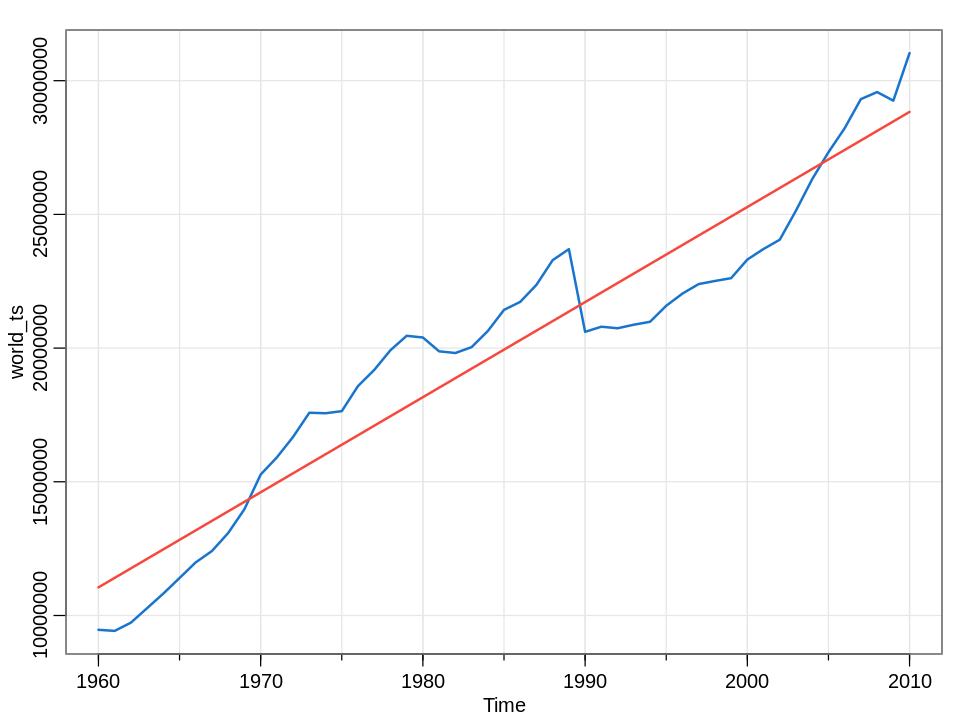

In [11]:
predictions_line_world = ts(fitted(fit_line_world), start=1960, frequency=1)
tsplot(world_ts, col=4, lwd=2)
lines(predictions_line_world, lwd=2, col=2)

#### Validación en test

Se obtienen tiempos en test, se pasan por el modelo y se grafican a continuación:

In [12]:
new_t = seq(2010, 2020, by=1) - 1960
new_t = ts(new_t,start=2010, freq=frequency(world_ts))

new_data = data.frame(t=new_t)
line_pred_world = predict(fit_line_world, new_data)

line_pred_world = ts(line_pred_world, start=2010, freq=1)

En celeste las predicciones para train y en rojo estan las predicciones para test.

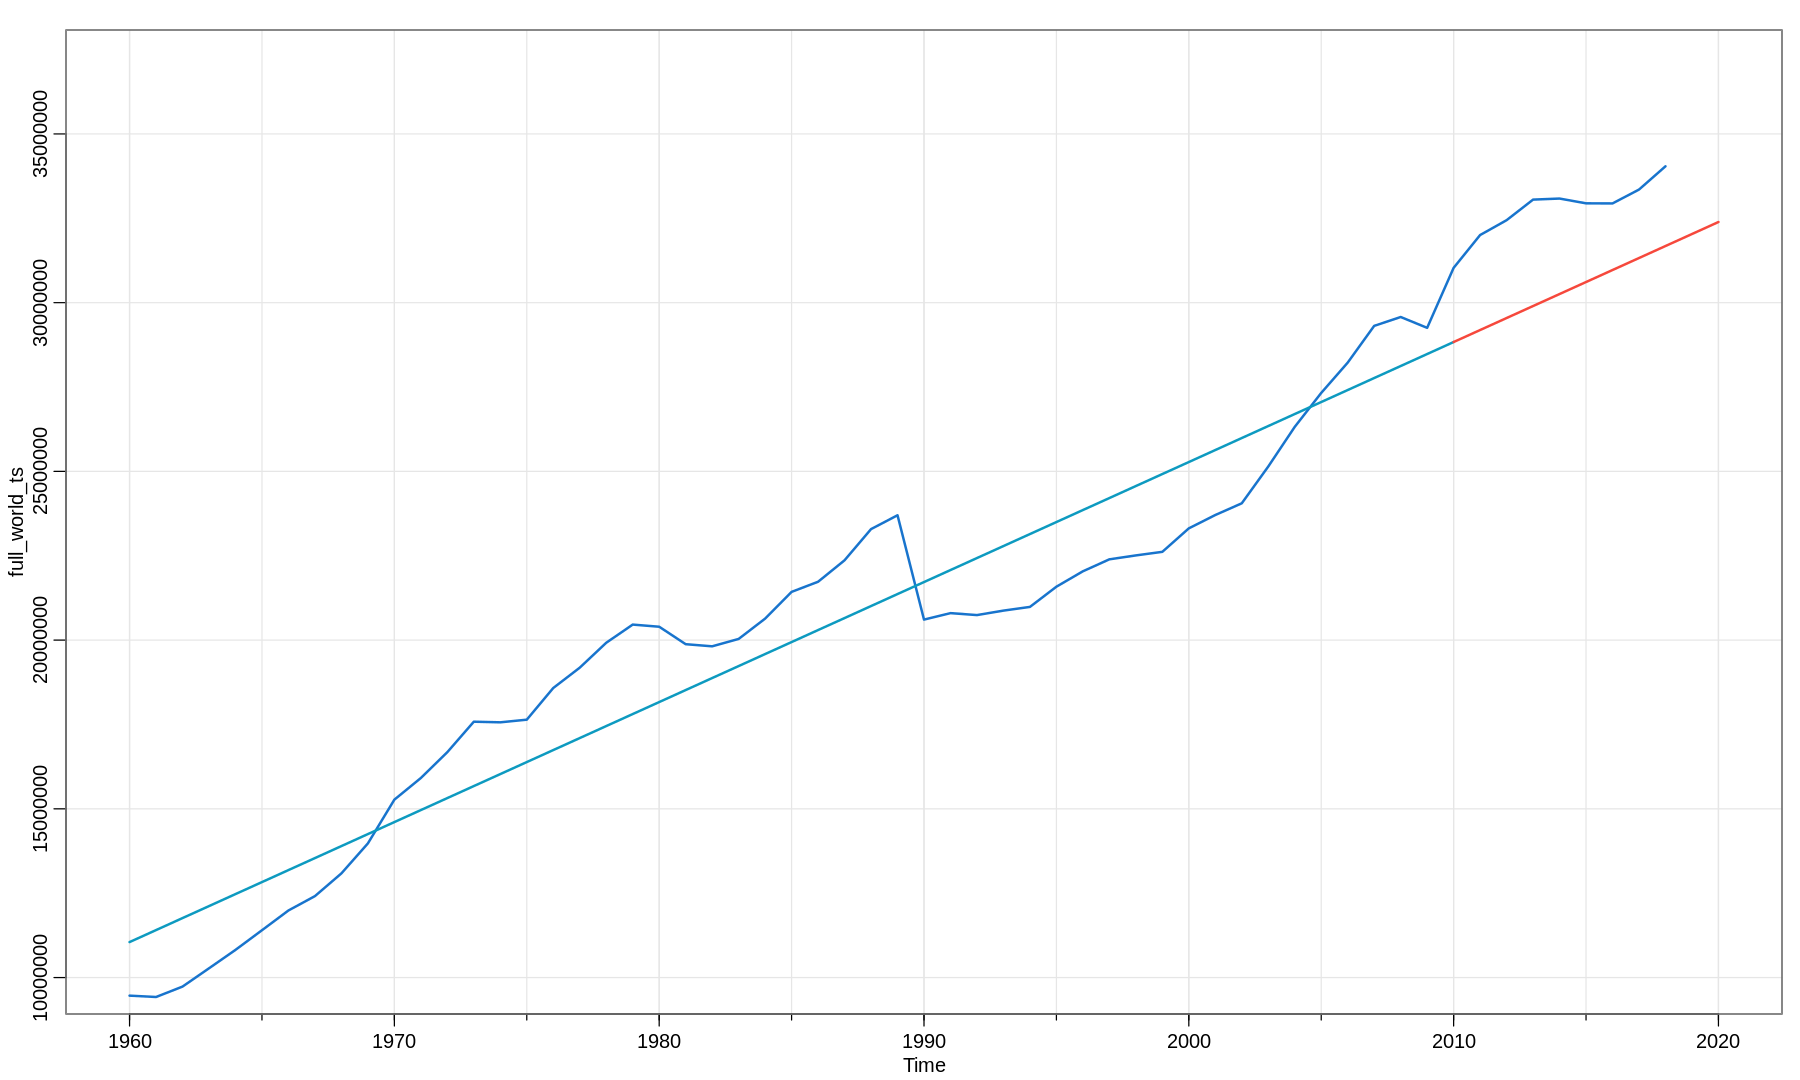

In [13]:
options(repr.plot.width=15, repr.plot.height=9)

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(predictions_line_world,lwd=2, col=5)
lines(line_pred_world,lwd=2, col=2)

#### Residuos

Los residuos no son ruido blanco. Parece haber un poco de estacionalidad.

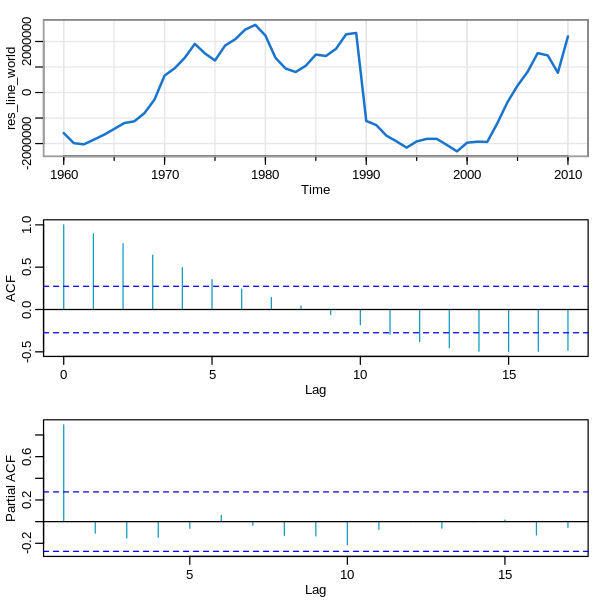

In [14]:
options(repr.plot.width=5, repr.plot.height=5)

res_line_world = ts(residuals(fit_line_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(3,1))
tsplot(res_line_world, lw =2, col = 4)
acf(res_line_world, col = 5)
pacf(res_line_world, col = 5)

#### Periodograma

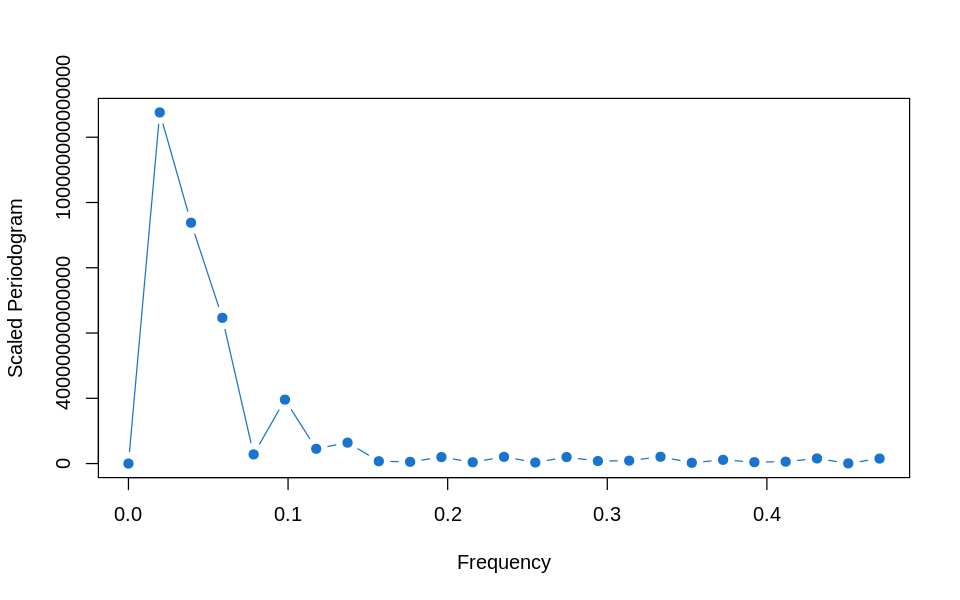

In [15]:
options(repr.plot.width=8, repr.plot.height=5)

s = as.numeric(res_line_world)
n = length(s)
P = 4/n*abs(fft(s))^2
P = P[1:floor(n/2)]
f = (0:(n/2-1))/n*frequency(world_ts)
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", col=4, lwd=1, pch=19)

#### Ajuste estacionalidad

Probamos ajustar la frecuencia antes encontrada.

In [16]:
t = time(world_ts) - 1960

C = ts(cos(2*pi*0.02*t), frequency=frequency(world_ts))
S = ts(sin(2*pi*0.02*t), frequency=frequency(world_ts))

fit_cos_sen_line_world = lm(res_line_world ~ C + S)
summary(fit_cos_sen_line_world)


Call:
lm(formula = res_line_world ~ C + S)

Residuals:
     Min       1Q   Median       3Q      Max 
-1493150 -1102200  -215936   719301  3087340 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    17782     182025   0.098  0.922585    
C            -906888     254935  -3.557  0.000855 ***
S            1201717     259886   4.624 0.0000286 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1299000 on 48 degrees of freedom
Multiple R-squared:  0.4149,	Adjusted R-squared:  0.3905 
F-statistic: 17.02 on 2 and 48 DF,  p-value: 0.000002592


Ajuste a los residuos:

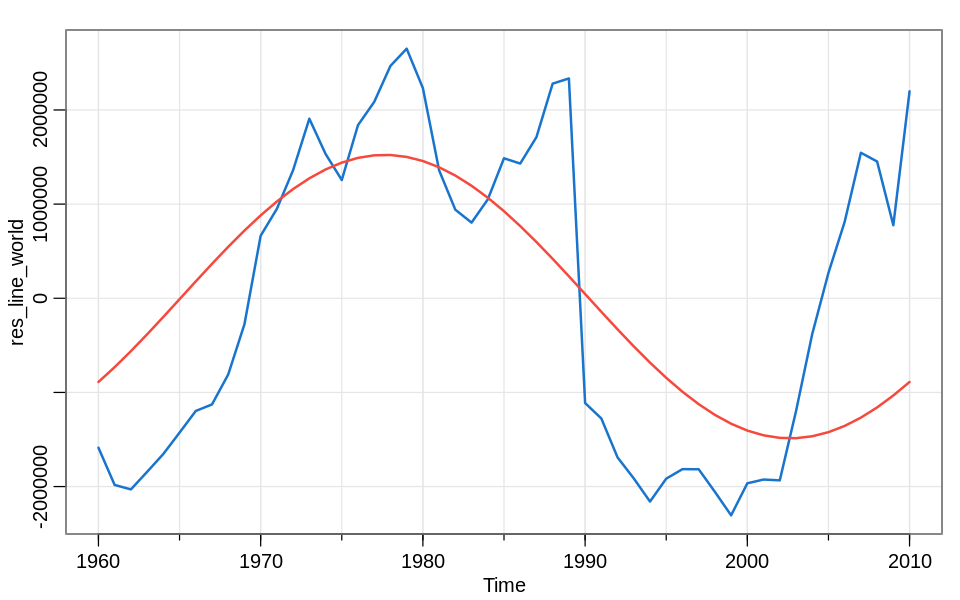

In [17]:
predictions_c_s_line_world = ts(fitted(fit_cos_sen_line_world), start=1960, frequency=frequency(world_ts))
tsplot(res_line_world, col=4, lwd=2)
lines(predictions_c_s_line_world, lwd=2, col=2)

#### Predicción en train - test

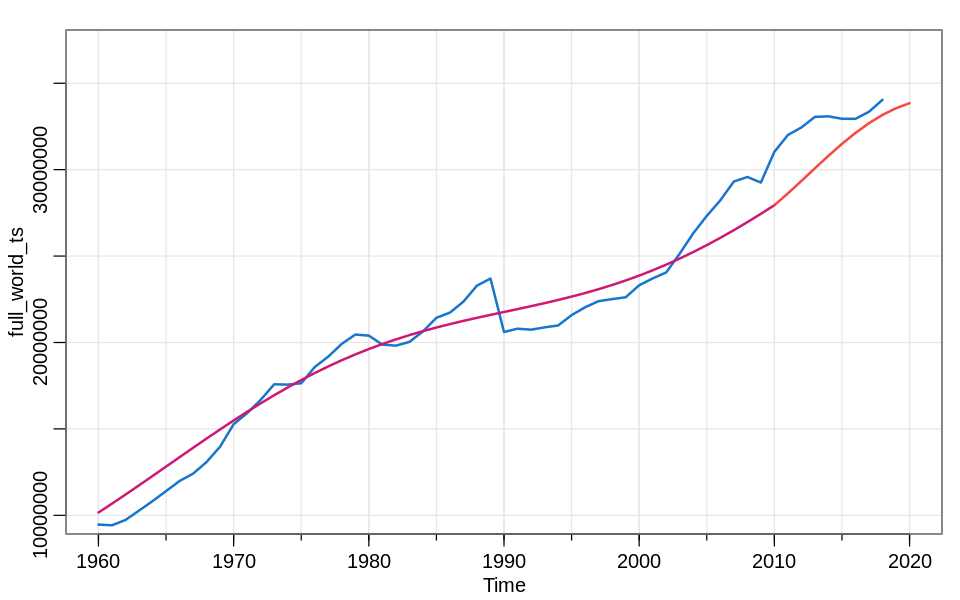

In [18]:
new_t = seq(2010, 2020, by=1) - 1960
new_t = ts(new_t, start=2010, freq=1)
new_data = data.frame(t = new_t, C = cos(2*pi*0.04*new_t), S = sin(2*pi*0.04*new_t))

c_s_pred_line_world = predict(fit_cos_sen_line_world, new_data)
c_s_pred_line_world = ts(c_s_pred_line_world,start=2010, freq=frequency(world_ts))

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), , ylim = c(10000000, 37000000))
lines(predictions_line_world + predictions_c_s_line_world, lwd=2, col=6)
lines(line_pred_world + c_s_pred_line_world, lwd=2, col=2)

#### Residuos

La estacionalidad parece haber desaparecido, pero todavia no es ruido blanco. Probamos ajustar ahora un modelo ARMA. Observando el acf y el pacf el mejor parece ser ARMA(1, 0). Se probó ajustar con un ARMA(1, 1) pero el componente de ma era muy poco significativo.

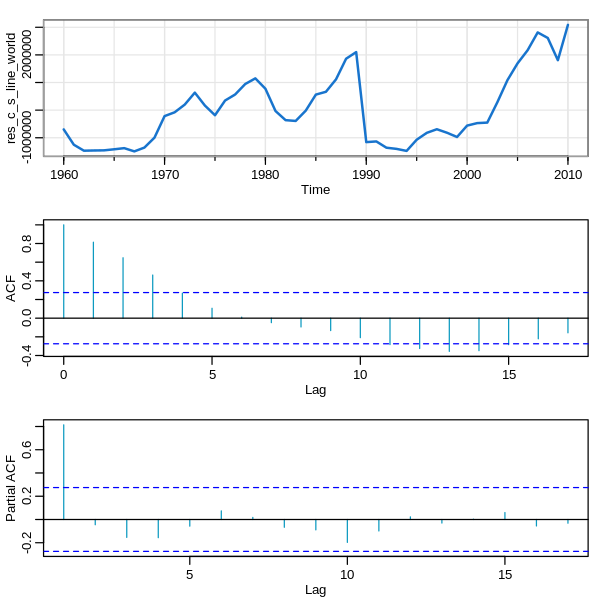

In [19]:
options(repr.plot.width=5, repr.plot.height=5)

res_c_s_line_world = ts(residuals(fit_cos_sen_line_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(3,1))
tsplot(res_c_s_line_world, lw =2, col = 4)
acf(res_c_s_line_world, col = 5)
pacf(res_c_s_line_world, col = 5)

#### Ajuste arma

In [20]:
fit_autorreg_line_world = Arima(res_c_s_line_world, order = c(1,0,0), include.mean = F)
fit_autorreg_line_world

Series: res_c_s_line_world 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.9022
s.e.  0.0653

sigma^2 estimated as 396497373076:  log likelihood=-753.7
AIC=1511.41   AICc=1511.66   BIC=1515.27

Ajuste a los residuos:

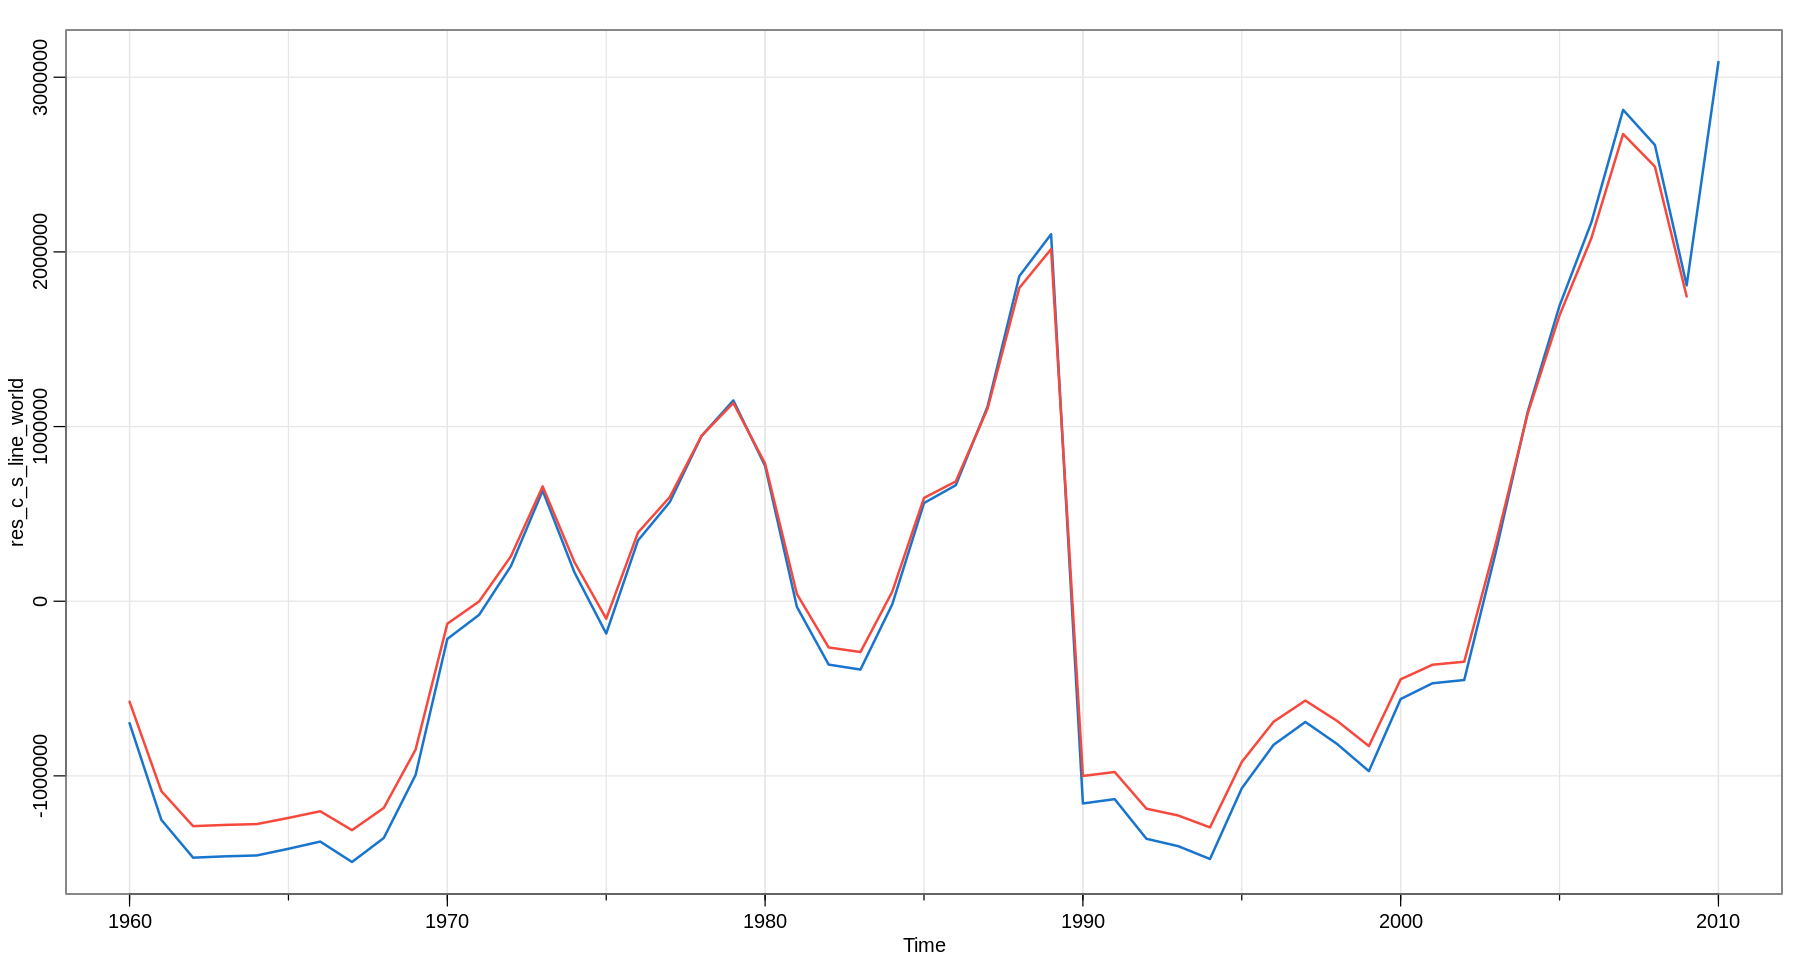

In [21]:
x1 = stats::lag(res_c_s_line_world, -1)
data = ts.intersect(res_c_s_line_world, x1)
fit_autorreg_line_world2 = lm(res_c_s_line_world ~ x1, data = data)

options(repr.plot.width=15, repr.plot.height=8)

pred_autorreg_line_world = ts(fitted(fit_autorreg_line_world2), start = 1960, frequency = frequency(world_ts))
tsplot(res_c_s_line_world, col = 4, lw = 2)
lines(pred_autorreg_line_world, col = 2, lw = 2)

#### Predicción en train - test

Utilizando la libreria forecast, vamos a no solo graficar la predicción, sino que vamos a establecer intervalos de confianza al 95%, ya que es una información valiosa a la hora de elgir el modelo a utilizar.

In [22]:
pred_line_world = forecast(fit_autorreg_line_world, h = 10)

In [23]:
pred_media = pred_line_world$mean
pred_lower = pred_line_world$lower[,2]
pred_upper = pred_line_world$upper[,2]

pred_media_model_1 = line_pred_world + c_s_pred_line_world + pred_media
pred_lower_model_1 = line_pred_world + c_s_pred_line_world + pred_lower
pred_upper_model_1 = line_pred_world + c_s_pred_line_world + pred_upper

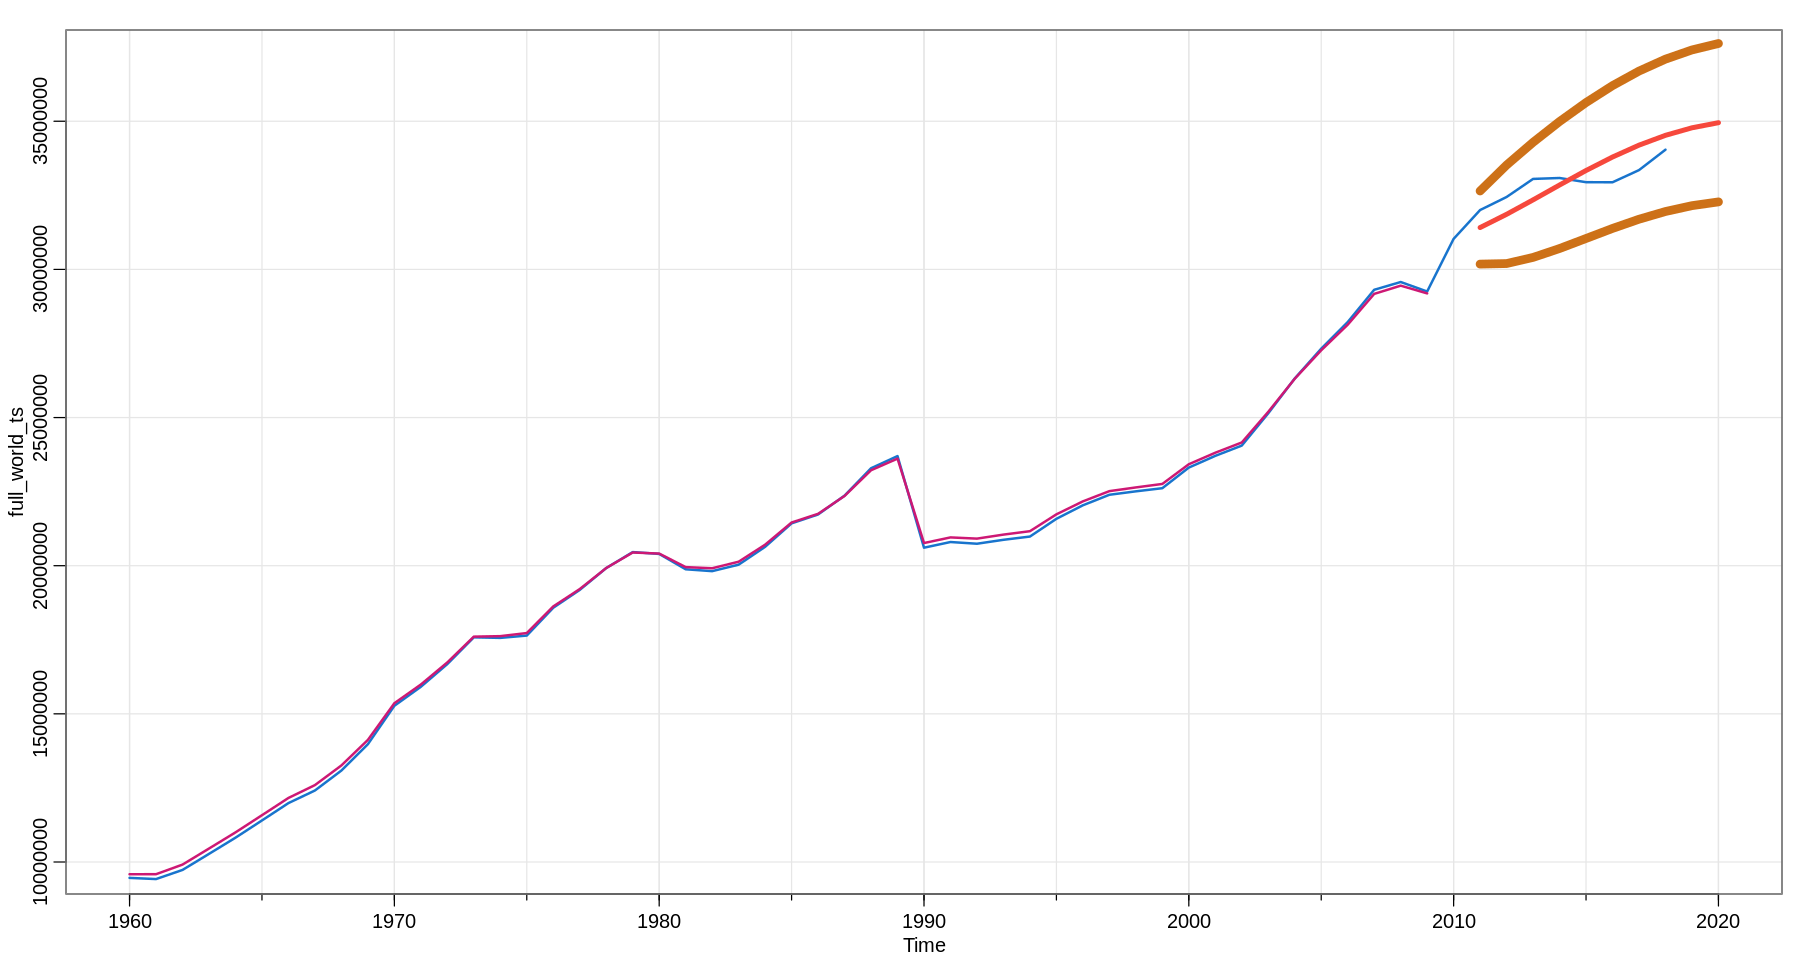

In [24]:
tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(predictions_line_world + predictions_c_s_line_world + pred_autorreg_line_world, lwd=2, col=6)
lines(pred_media_model_1, lwd=4, col=2)
lines(pred_lower_model_1, col=7, lwd=7)
lines(pred_upper_model_1, col=7, lwd=7)

El ajuste parece ser bueno y seguir la tendencia de la serie.

#### Residuos

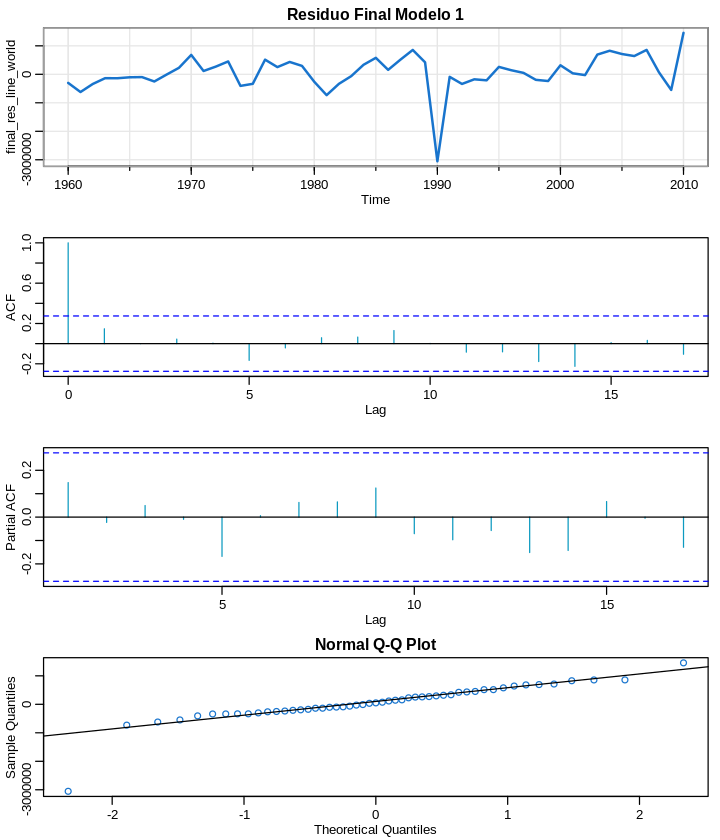

In [25]:
options(repr.plot.width=6, repr.plot.height=7)

final_res_line_world = ts(residuals(fit_autorreg_line_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(4,1))
tsplot(final_res_line_world, lw =2, col = 4, main ='Residuo Final Modelo 1')
acf(final_res_line_world, col = 5)
pacf(final_res_line_world, col = 5)
qqnorm(final_res_line_world, col=4)
qqline(final_res_line_world)

El residuo final si es ruido blanco, ya no parece haber mas información en la serie que podamos extraer. A continuación mas metricas interesantes del modelo:

[1] "AIC Modelo 1:"


[1] 1511.407

[1] "BIC Modelo 1:"


[1] 1515.27


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with zero mean
Q* = 4.5679, df = 9, p-value = 0.8702

Model df: 1.   Total lags used: 10



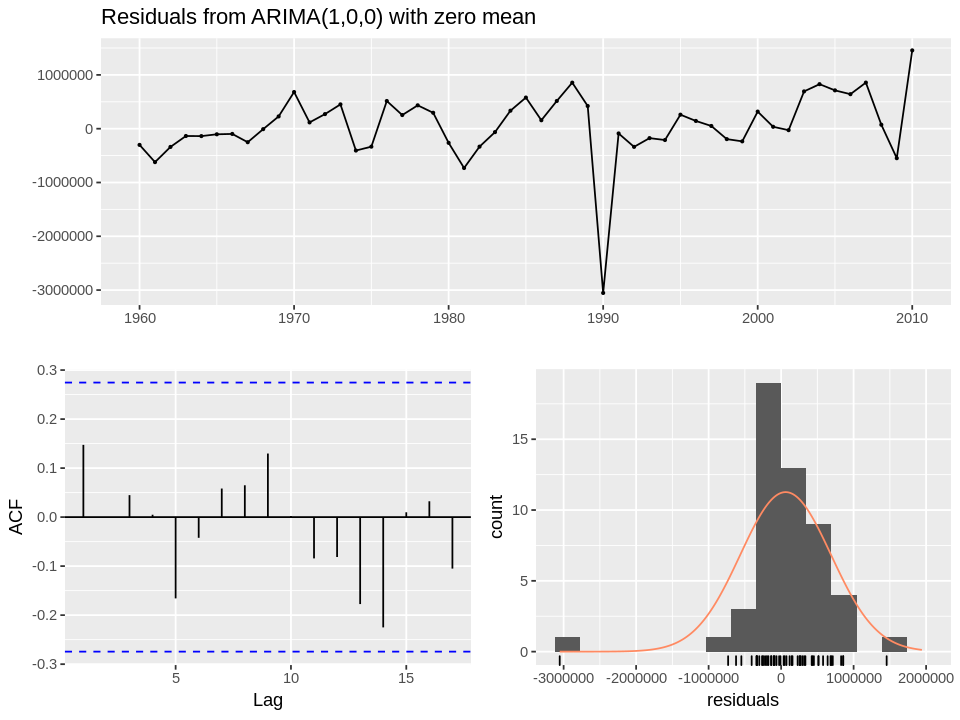

In [26]:
options(repr.plot.width=8, repr.plot.height=6)

print('AIC Modelo 1:')
AIC(fit_autorreg_line_world)
print('BIC Modelo 1:')
BIC(fit_autorreg_line_world)

checkresiduals(fit_autorreg_line_world)

### Modelo 2

El modelo 2 es igual al anterior pero vamos a ajustar una cuadratica en lugar de una recta.

#### Ajuste Cuadratico

In [27]:
t = time(world_ts) - 1960
t2 = t^2
fit_cuad_world = lm(world_ts ~ t + t2)
summary(fit_cuad_world)


Call:
lm(formula = world_ts ~ t + t2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2502584 -1418894   265787  1335616  3230959 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 10018616     655502  15.284 < 0.0000000000000002 ***
t             482101      60630   7.951       0.000000000261 ***
t2             -2529       1173  -2.157               0.0361 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1622000 on 48 degrees of freedom
Multiple R-squared:  0.9178,	Adjusted R-squared:  0.9144 
F-statistic: 267.9 on 2 and 48 DF,  p-value: < 0.00000000000000022


#### Predicción train

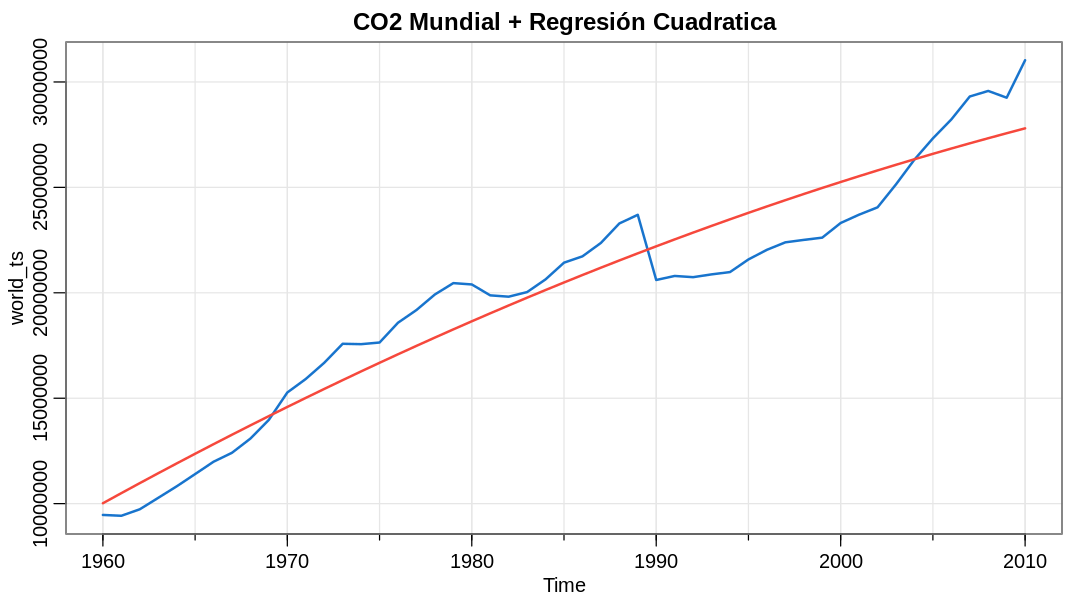

In [28]:
options(repr.plot.width=9, repr.plot.height=5)

predictions_cuad_world = ts(fitted(fit_cuad_world), start = 1960, frequency = frequency(world_ts))
tsplot(world_ts, col=4, lwd=2, main ='CO2 Mundial + Regresión Cuadratica')
lines(predictions_cuad_world, lwd=2, col = 2)

#### Predicción test

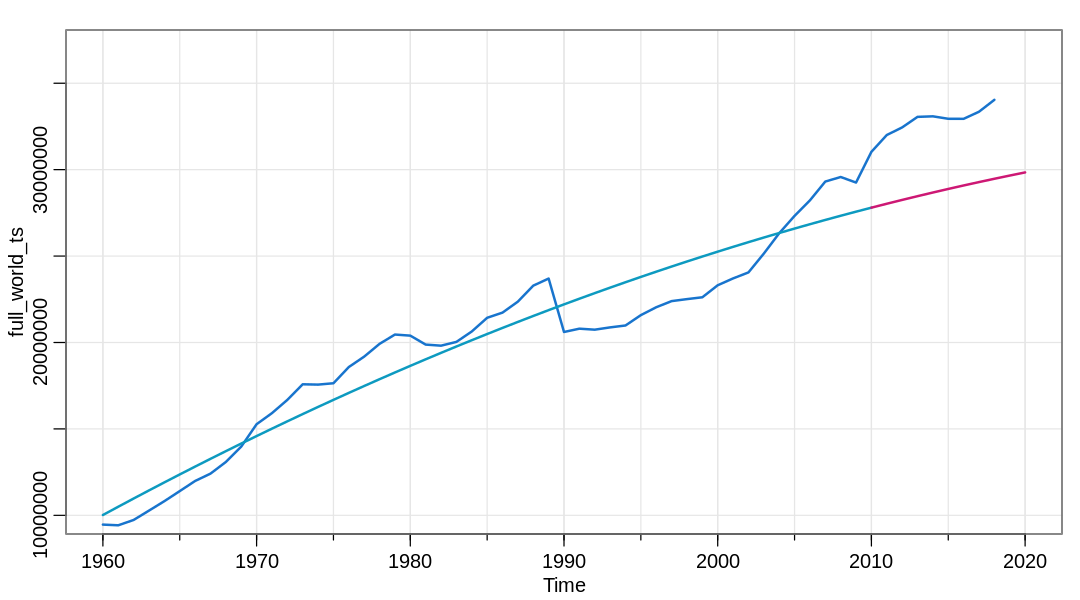

In [29]:
new_data_cuad = data.frame(t = new_t, t2 = new_t^2)

cuad_pred_world = predict(fit_cuad_world, new_data_cuad)
cuad_pred_world = ts(cuad_pred_world, start=2010, freq=1)

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(predictions_cuad_world,lwd=2, col=5)
lines(cuad_pred_world,lwd=2, col=6)

#### Residuos

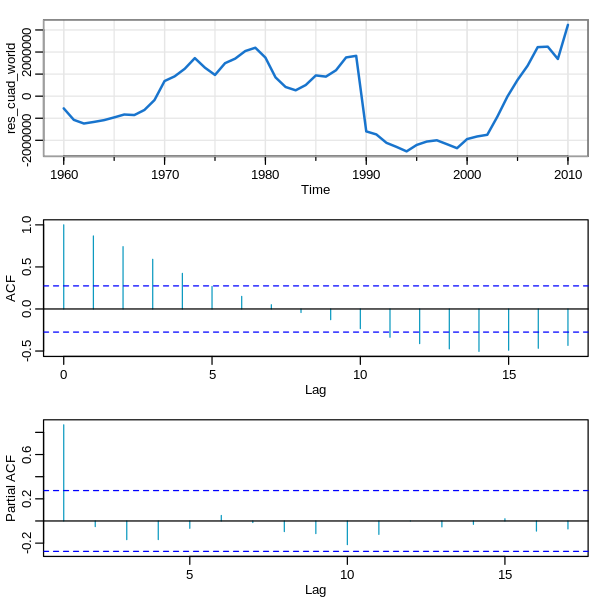

In [30]:
options(repr.plot.width=5, repr.plot.height=5)

res_cuad_world = ts(residuals(fit_cuad_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(3,1))
tsplot(res_cuad_world, lw =2, col = 4)
acf(res_cuad_world, col = 5)
pacf(res_cuad_world, col = 5)

#### Periodograma

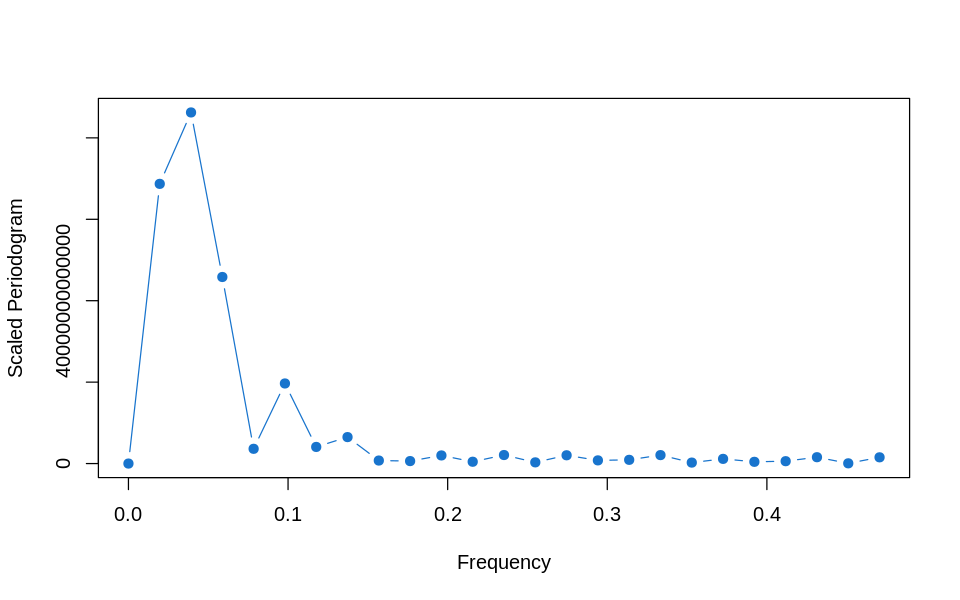

In [31]:
options(repr.plot.width=8, repr.plot.height=5)

s = as.numeric(res_cuad_world)
n = length(s)
P = 4/n*abs(fft(s))^2
P = P[1:floor(n/2)]
f = (0:(n/2-1))/n*frequency(world_ts)
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", col=4, lwd=1, pch=19)

#### Ajuste Estacionalidad

In [32]:
t = time(world_ts) - 1960
C = ts(cos(2*pi*0.03*t), frequency=frequency(world_ts))
S = ts(sin(2*pi*0.03*t), frequency=frequency(world_ts))

fit_cos_sen_cuad_world = lm(res_cuad_world ~ C + S)
summary(fit_cos_sen_cuad_world)


Call:
lm(formula = res_cuad_world ~ C + S)

Residuals:
     Min       1Q   Median       3Q      Max 
-1342873  -691907   -12083   561289  2303446 

Coefficients:
            Estimate Std. Error t value           Pr(>|t|)    
(Intercept)   161024     120159   1.340              0.187    
C           -1757366     160734 -10.933 0.0000000000000126 ***
S            -776281     171622  -4.523 0.0000400165760501 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 819600 on 48 degrees of freedom
Multiple R-squared:  0.7447,	Adjusted R-squared:  0.734 
F-statistic:    70 on 2 and 48 DF,  p-value: 0.000000000000005889


#### Ajuste residuos

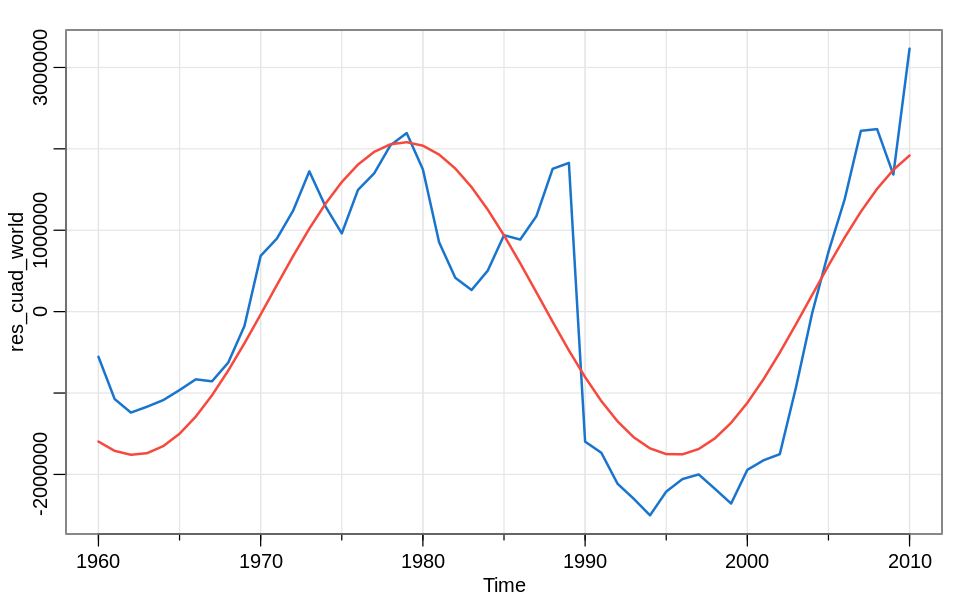

In [33]:
predictions_c_s_cuad_world = ts(fitted(fit_cos_sen_cuad_world), start=1960, frequency=frequency(world_ts))
tsplot(res_cuad_world, col=4, lwd=2)
lines(predictions_c_s_cuad_world, lwd=2, col=2)

#### Predicción Train-Test

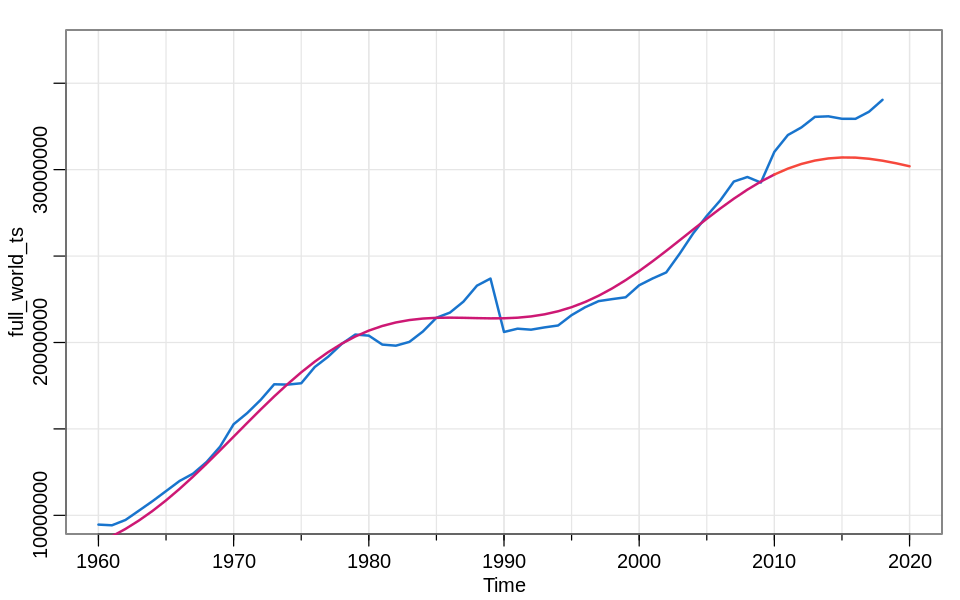

In [34]:
new_t = seq(2010, 2020, by=1) - 1960
new_t = ts(new_t, start=2010, freq=1)
new_data = data.frame(t = new_t, t2 = new_t^2, C = cos(2*pi*0.03*new_t), S = sin(2*pi*0.03*new_t))

c_s_pred_cuad_world = predict(fit_cos_sen_cuad_world, new_data)
c_s_pred_cuad_world = ts(c_s_pred_cuad_world,start=2010, freq=frequency(world_ts))

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(predictions_cuad_world + predictions_c_s_cuad_world, lwd=2, col=6)
lines(cuad_pred_world + c_s_pred_cuad_world, lwd=2, col=2)

#### Residuos

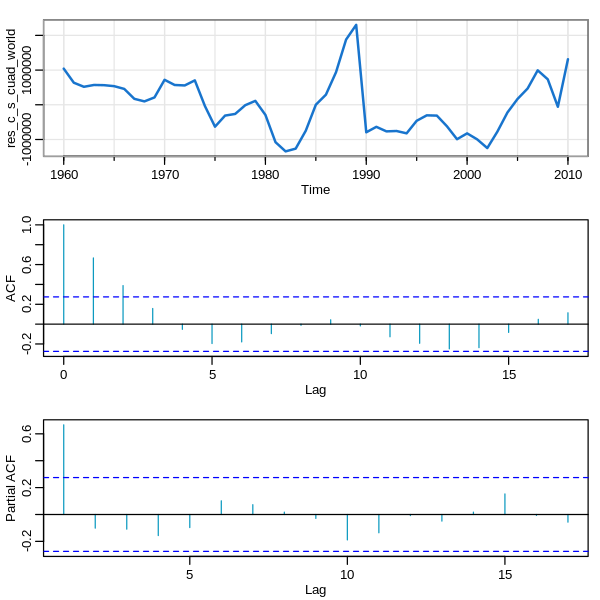

In [35]:
options(repr.plot.width=5, repr.plot.height=5)

res_c_s_cuad_world = ts(residuals(fit_cos_sen_cuad_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(3,1))
tsplot(res_c_s_cuad_world, lw =2, col = 4)
acf(res_c_s_cuad_world, col = 5)
pacf(res_c_s_cuad_world, col = 5)

#### Ajuste ARMA

In [36]:
fit_autorreg_cuad_world = Arima(res_c_s_cuad_world, order = c(1,0,0), include.mean = F)
fit_autorreg_cuad_world

Series: res_c_s_cuad_world 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.7141
s.e.  0.1015

sigma^2 estimated as 331106922218:  log likelihood=-748.62
AIC=1501.25   AICc=1501.5   BIC=1505.11

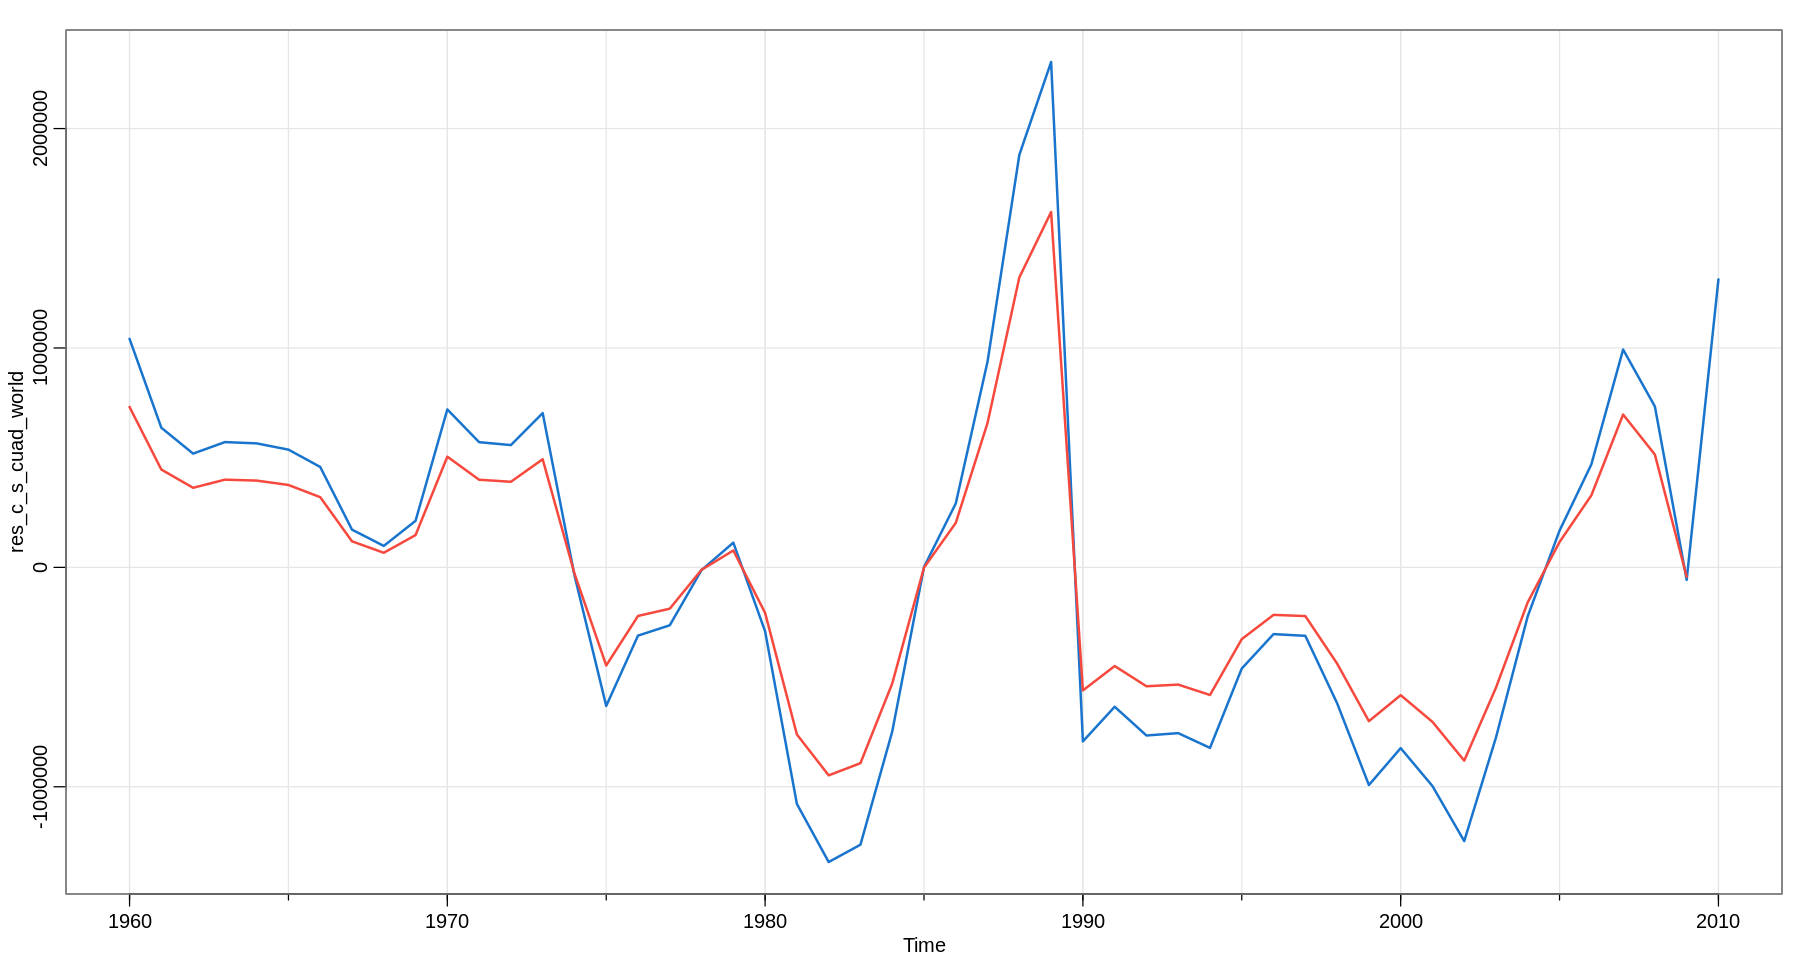

In [37]:
x1 = stats::lag(res_c_s_cuad_world, -1)
data = ts.intersect(res_c_s_cuad_world, x1)
fit_autorreg_cuad_world2 = lm(res_c_s_cuad_world ~ x1, data = data)

options(repr.plot.width=15, repr.plot.height=8)

pred_autorreg_cuad_world = ts(fitted(fit_autorreg_cuad_world2), start = 1960, frequency = frequency(world_ts))
tsplot(res_c_s_cuad_world, col = 4, lw = 2)
lines(pred_autorreg_cuad_world, col = 2, lw = 2)

#### Predicción Train-Test

In [38]:
pred_cuad_world = forecast(fit_autorreg_cuad_world, h = 10)

In [39]:
pred_media = pred_cuad_world$mean
pred_lower = pred_cuad_world$lower[,2]
pred_upper = pred_cuad_world$upper[,2]

pred_media_model_2 = cuad_pred_world + c_s_pred_cuad_world + pred_media
pred_lower_model_2 = cuad_pred_world + c_s_pred_cuad_world + pred_lower
pred_upper_model_2 = cuad_pred_world + c_s_pred_cuad_world + pred_upper

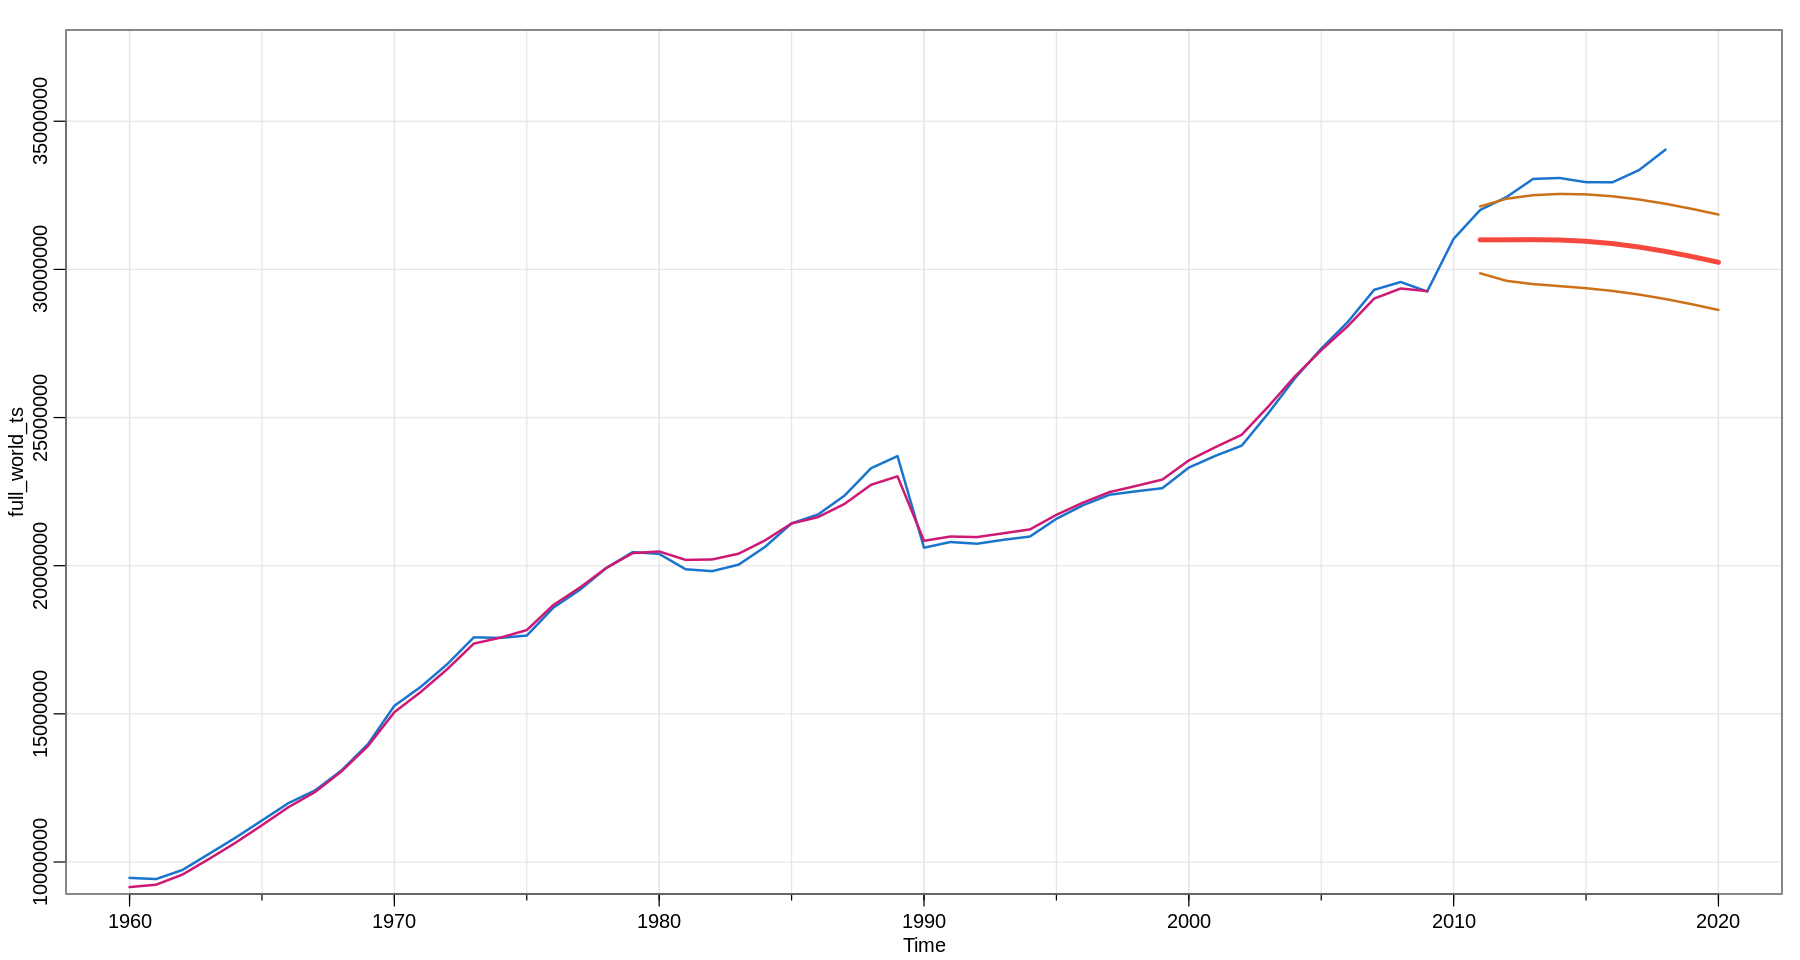

In [40]:
tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(predictions_cuad_world + predictions_c_s_cuad_world + pred_autorreg_cuad_world, lwd=2, col=6)
lines(pred_media_model_2, lwd=4, col=2)
lines(pred_lower_model_2, col=7, lwd=2)
lines(pred_upper_model_2, col=7, lwd=2)

Podemos notar un poco de sobreajuste, la cuadratica no fue un buen fit para esta serie.

#### Residuos

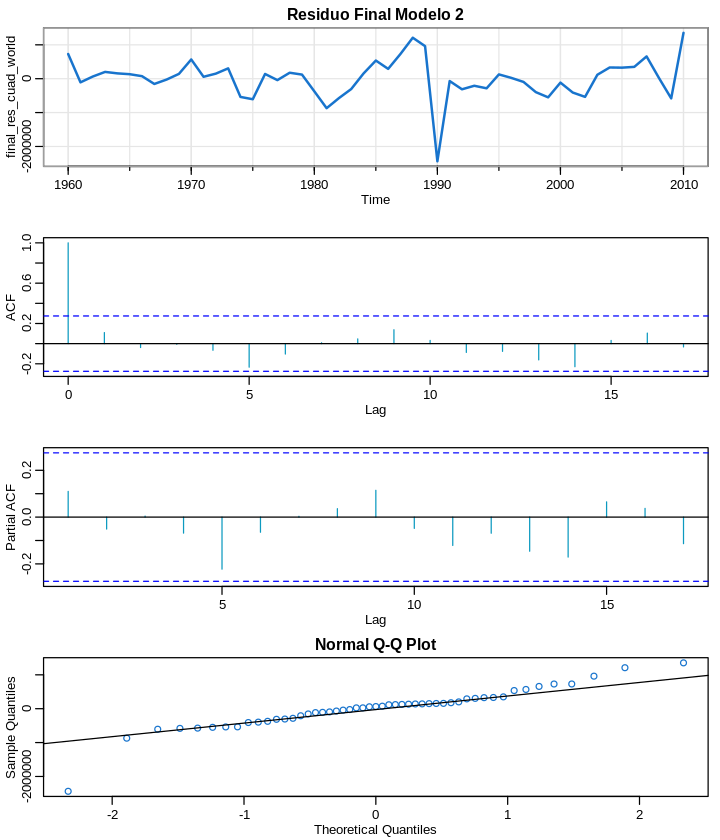

In [41]:
options(repr.plot.width=6, repr.plot.height=7)

final_res_cuad_world = ts(residuals(fit_autorreg_cuad_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(4,1))
tsplot(final_res_cuad_world, lw =2, col = 4, main ='Residuo Final Modelo 2')
acf(final_res_cuad_world, col = 5)
pacf(final_res_cuad_world, col = 5)
qqnorm(final_res_cuad_world, col=4)
qqline(final_res_cuad_world)

Otras metricas:

[1] "AIC Modelo 2:"


[1] 1501.246

[1] "BIC Modelo 2:"


[1] 1505.11


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with zero mean
Q* = 6.2534, df = 9, p-value = 0.7143

Model df: 1.   Total lags used: 10



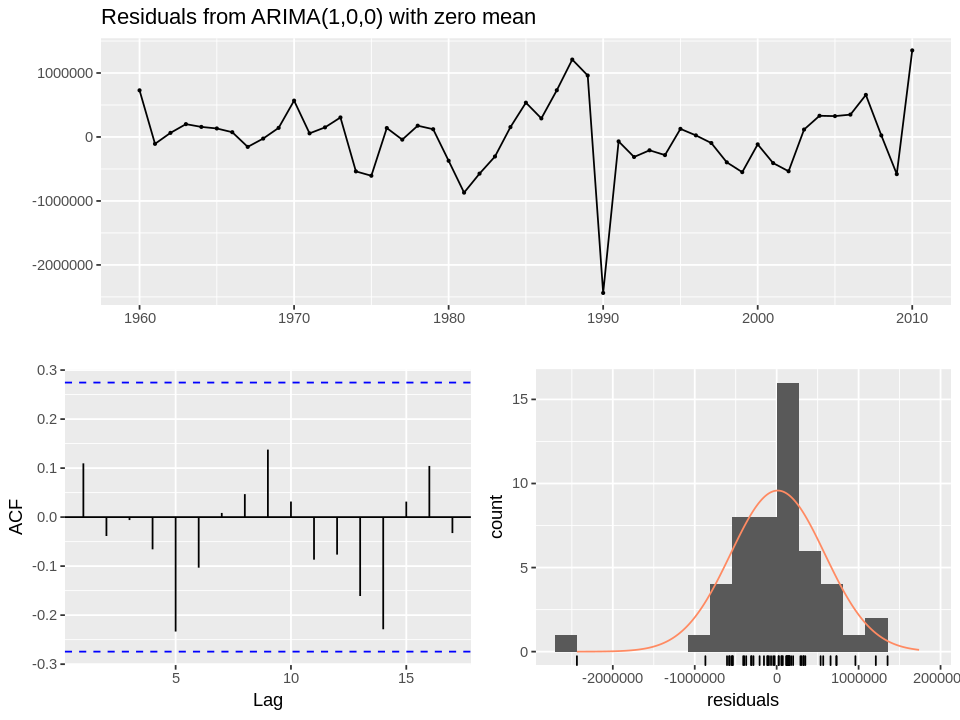

In [42]:
options(repr.plot.width=8, repr.plot.height=6)

print('AIC Modelo 2:')
AIC(fit_autorreg_cuad_world)
print('BIC Modelo 2:')
BIC(fit_autorreg_cuad_world)

checkresiduals(fit_autorreg_cuad_world)

### Modelo 3

EL modelo 3 es analogo al anterior pero ajustando una cuadratica

#### Ajuste con una cubica en lugar de una lineal

In [43]:
t = time(world_ts) - 1960
t2 = t^2
t3 = t^3
fit_cub_world = lm(world_ts ~ t + t2 + t3)
summary(fit_cub_world)


Call:
lm(formula = world_ts ~ t + t2 + t3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1476276  -735322  -175465   643374  2569077 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 7101727.9   525936.5  13.503 < 0.0000000000000002 ***
t           1218863.0    92003.0  13.248 < 0.0000000000000002 ***
t2           -39734.3     4300.1  -9.240     0.00000000000385 ***
t3              496.1       56.5   8.779     0.00000000001796 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1009000 on 47 degrees of freedom
Multiple R-squared:  0.9689,	Adjusted R-squared:  0.9669 
F-statistic: 487.4 on 3 and 47 DF,  p-value: < 0.00000000000000022


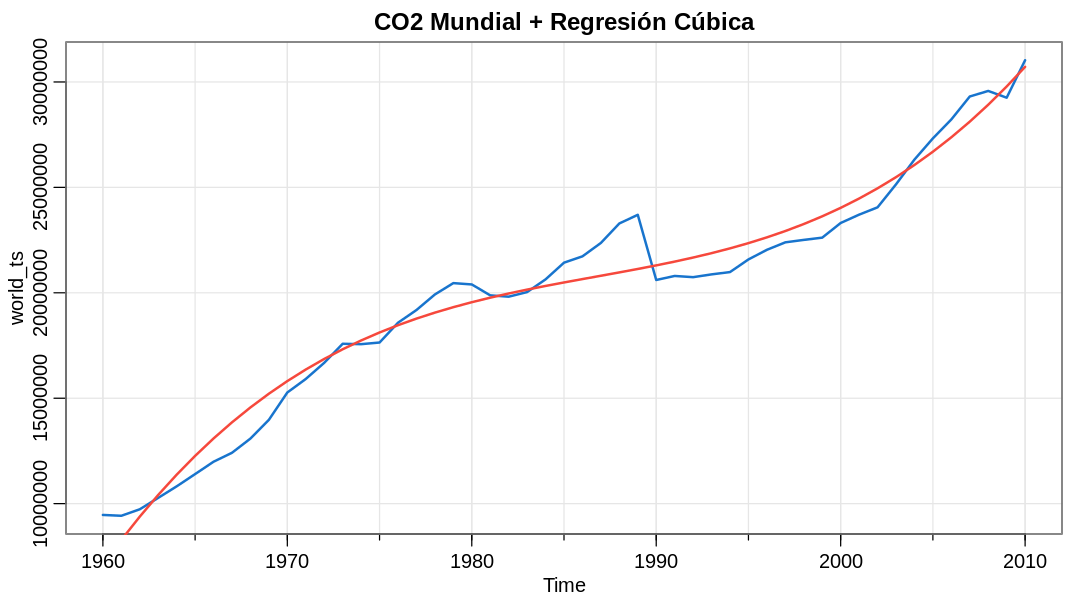

In [44]:
options(repr.plot.width=9, repr.plot.height=5)

predictions_cub_world = ts(fitted(fit_cub_world), start = 1960, frequency = frequency(world_ts))
tsplot(world_ts, col=4, lwd=2, main ='CO2 Mundial + Regresión Cúbica')
lines(predictions_cub_world, lwd=2, col = 2)

#### Ajuste train-test

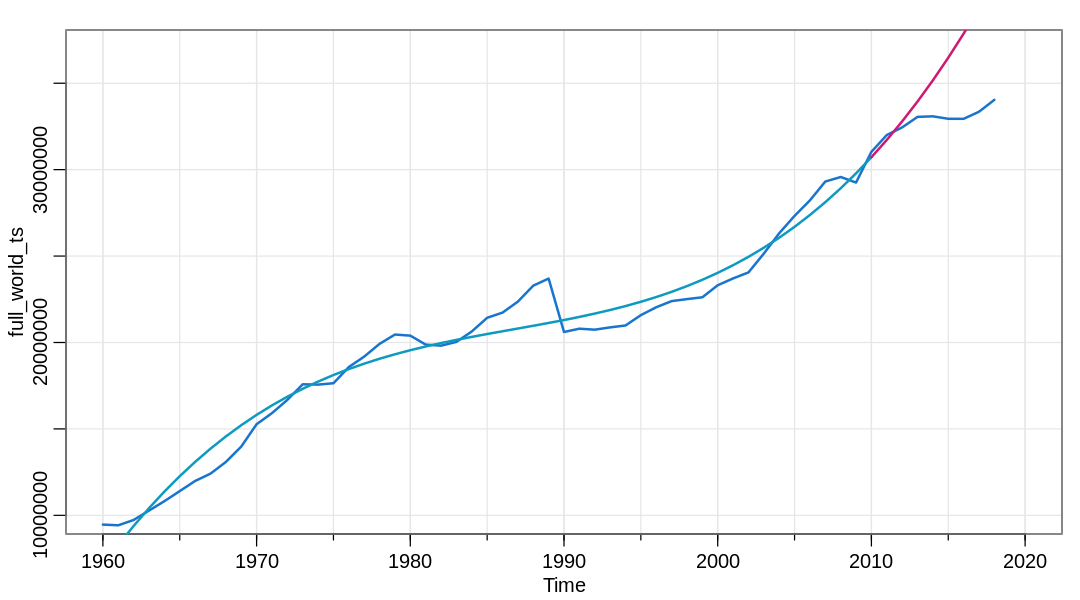

In [45]:
new_data_cub = data.frame(t = new_t, t2 = new_t^2, t3 = new_t^3)

cub_pred_world = predict(fit_cub_world, new_data_cub)
cub_pred_world = ts(cub_pred_world, start=2010, freq=1)

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(predictions_cub_world,lwd=2, col=5)
lines(cub_pred_world,lwd=2, col=6)

#### Residuos

Los residuos casi no tienen componente estacional. Tampoco es ruido blanco, por lo que procedemos al ajuste arma.

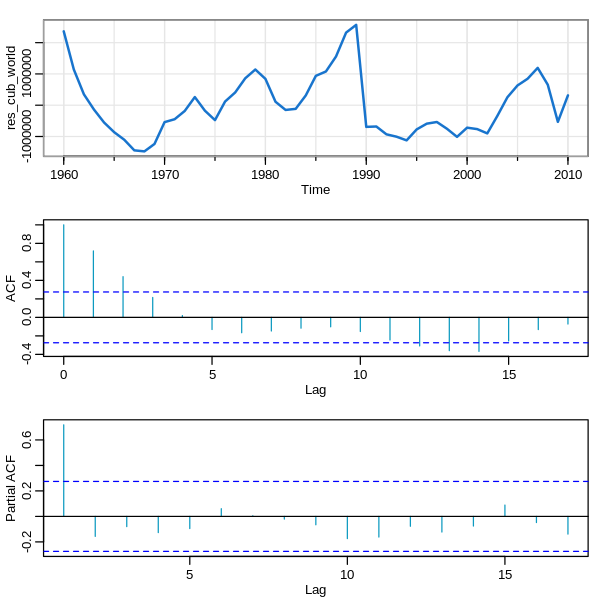

In [46]:
options(repr.plot.width=5, repr.plot.height=5)

res_cub_world = ts(residuals(fit_cub_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(3,1))
tsplot(res_cub_world, lw =2, col = 4)
acf(res_cub_world, col = 5)
pacf(res_cub_world, col = 5)

#### Ajuste Arma

In [47]:
fit_autorreg_cub_world = arima(res_cub_world, order = c(1,0,0), include.mean = F)
fit_autorreg_cub_world


Call:
arima(x = res_cub_world, order = c(1, 0, 0), include.mean = F)

Coefficients:
         ar1
      0.7950
s.e.  0.0912

sigma^2 estimated as 389300308727:  log likelihood = -753.4,  aic = 1510.8

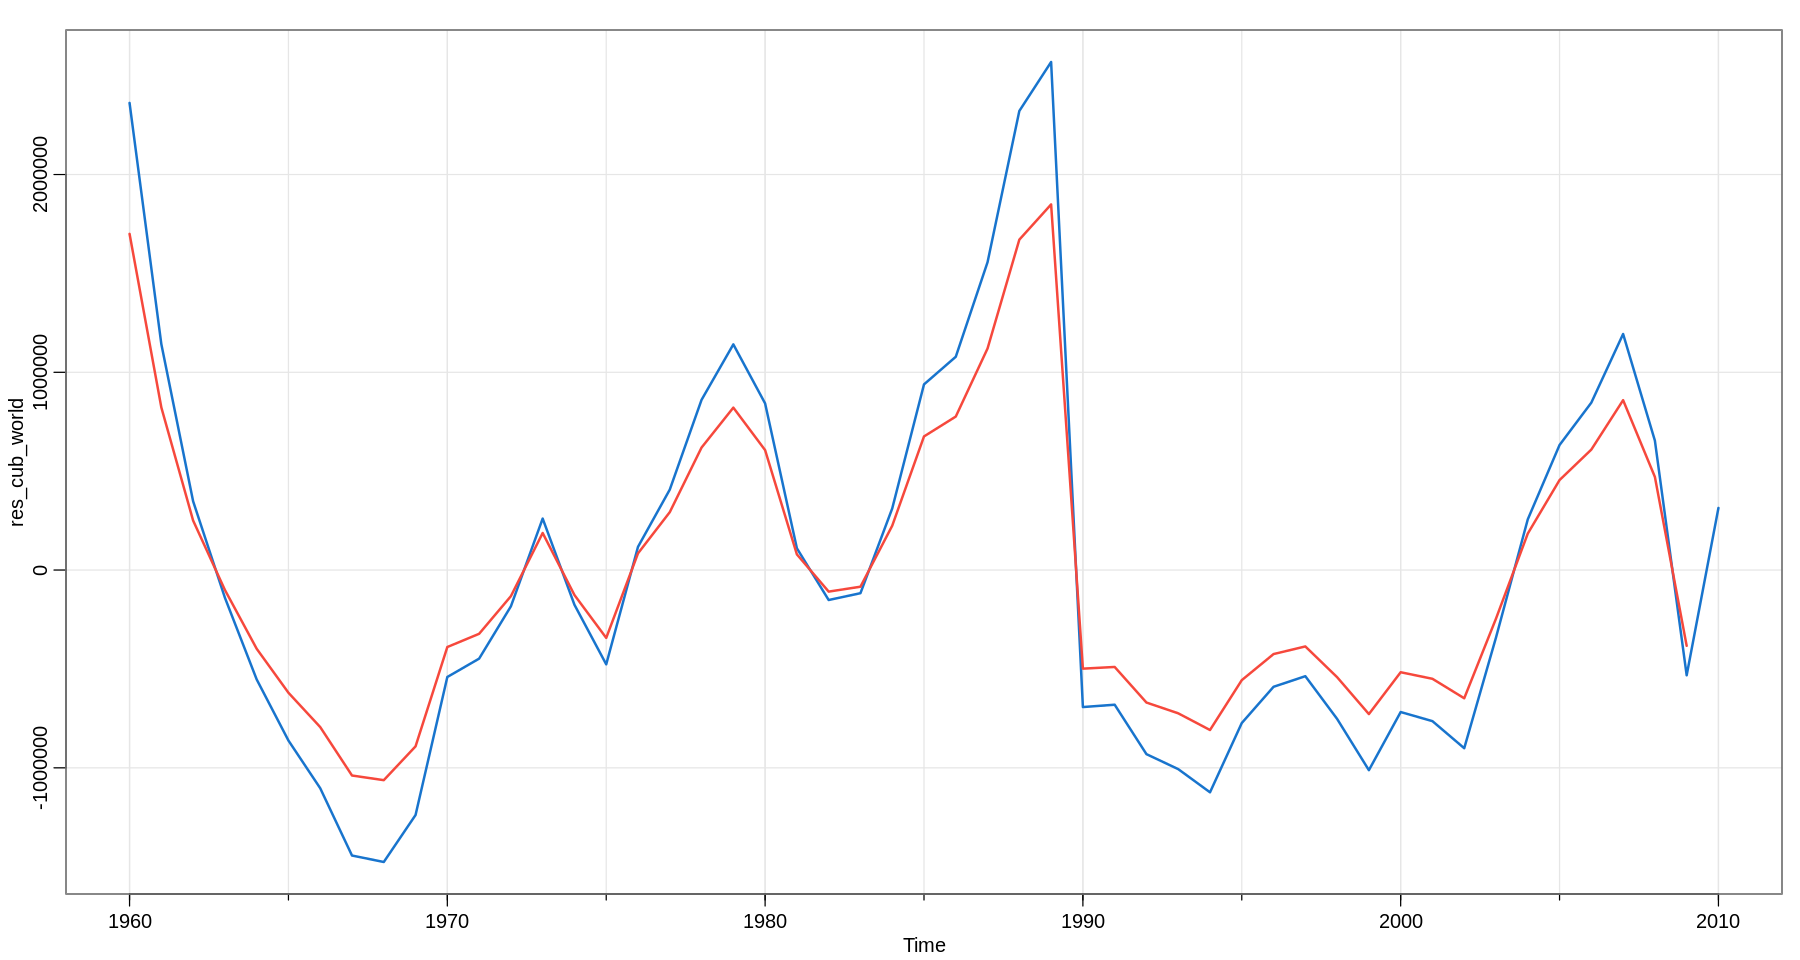

In [48]:
x1 = stats::lag(res_cub_world, -1)
data = ts.intersect(res_cub_world, x1)
fit_autorreg_cub_world2 = lm(res_cub_world ~ 0 + x1, data = data)

options(repr.plot.width=15, repr.plot.height=8)

pred_autorreg_cub_world = ts(fitted(fit_autorreg_cub_world2), start = 1960, frequency = frequency(world_ts))
tsplot(res_cub_world, col = 4, lw = 2)
lines(pred_autorreg_cub_world, col = 2, lw = 2)

#### Predicción Train-Test

In [49]:
pred_cub_world = forecast(fit_autorreg_cub_world, h = 10)

In [50]:
pred_media = pred_cub_world$mean
pred_lower = pred_cub_world$lower[,2]
pred_upper = pred_cub_world$upper[,2]

pred_media_model_3 = cub_pred_world + pred_media
pred_lower_model_3 = cub_pred_world + pred_lower
pred_upper_model_3 = cub_pred_world + pred_upper

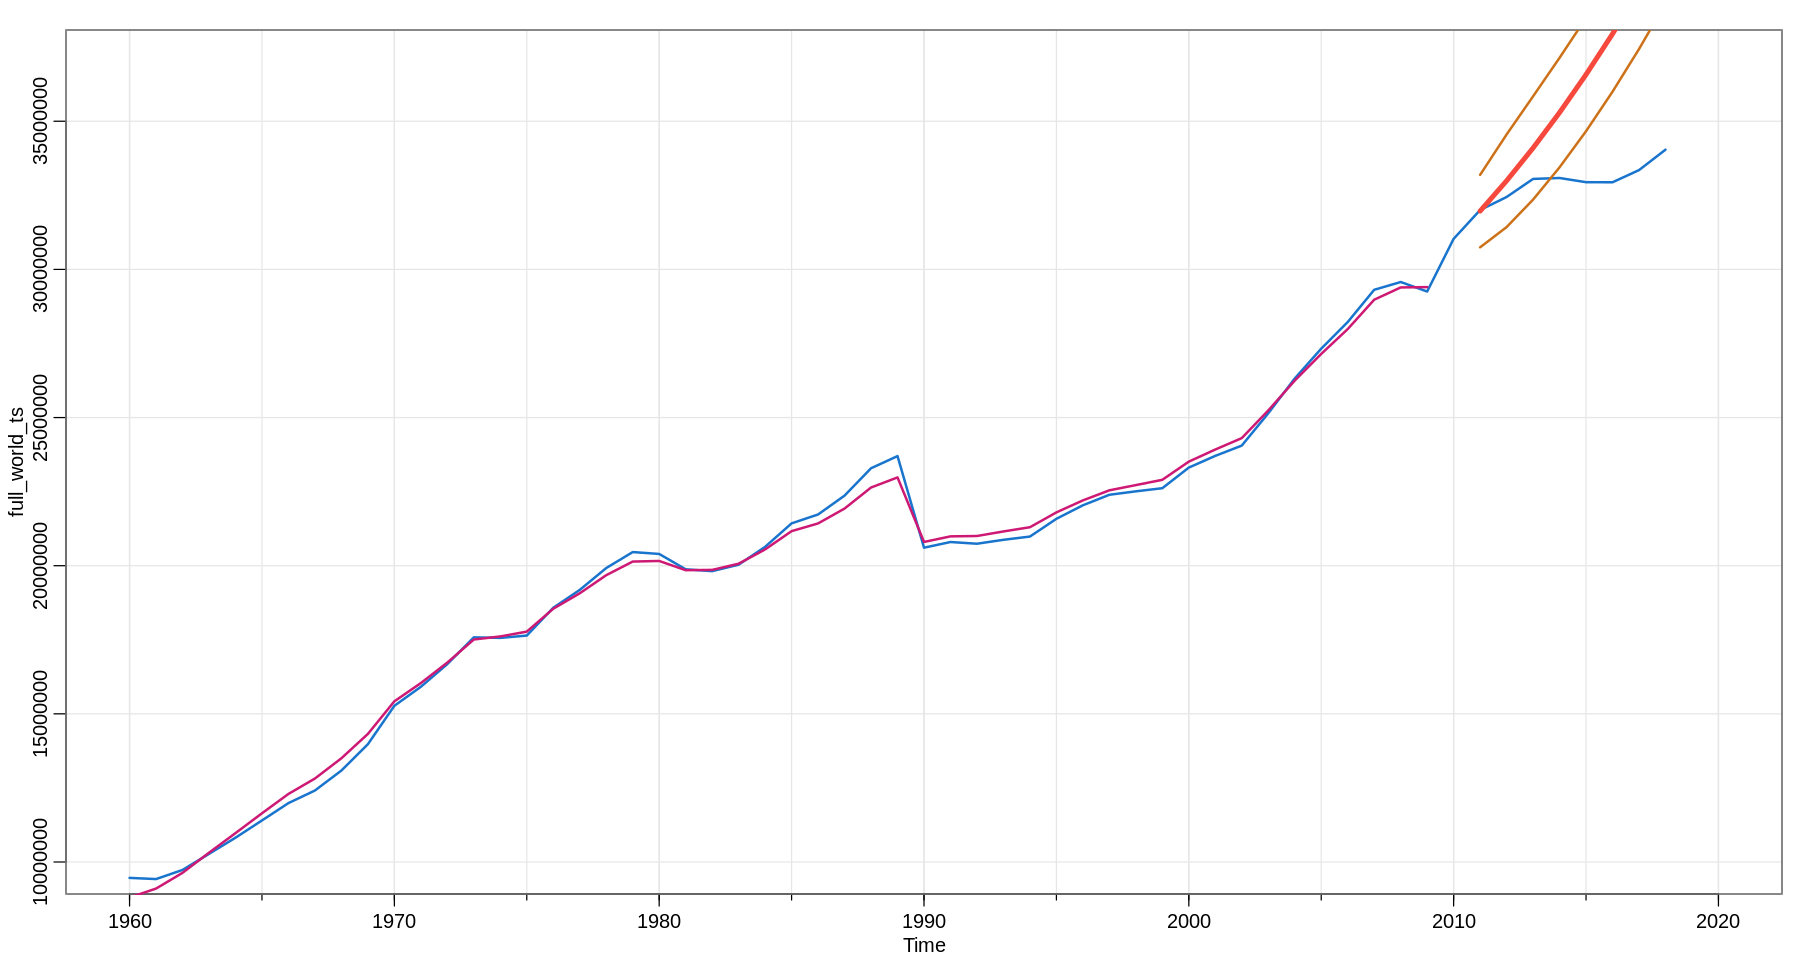

In [51]:
tsplot(full_world_ts, lwd=2, col=4, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(predictions_cub_world + pred_autorreg_cub_world, lwd=2, col=6)
lines(pred_media_model_3, lwd=4, col=2)
lines(pred_lower_model_3, col=7, lwd=2)
lines(pred_upper_model_3, col=7, lwd=2)

A diferencia del modelo anterior, que subestimaba el aumento de CO2, este parece sobreestimar el mismo.

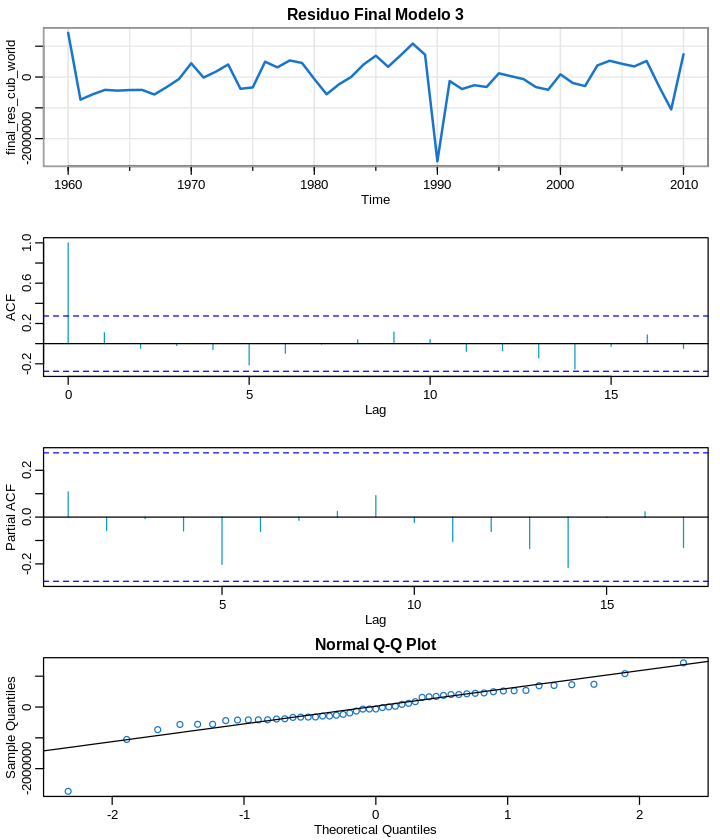

In [52]:
options(repr.plot.width=6, repr.plot.height=7)

final_res_cub_world = ts(residuals(fit_autorreg_cub_world), start=1960, frequency=frequency(world_ts))
par(mfrow = c(4,1))
tsplot(final_res_cub_world, lw =2, col = 4, main ='Residuo Final Modelo 3')
acf(final_res_cub_world, col = 5)
pacf(final_res_cub_world, col = 5)
qqnorm(final_res_cub_world, col=4)
qqline(final_res_cub_world)

[1] "AIC Modelo 3:"


[1] 1510.8

[1] "BIC Modelo 3:"


[1] 1514.664


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with zero mean
Q* = 5.1459, df = 9, p-value = 0.8214

Model df: 1.   Total lags used: 10



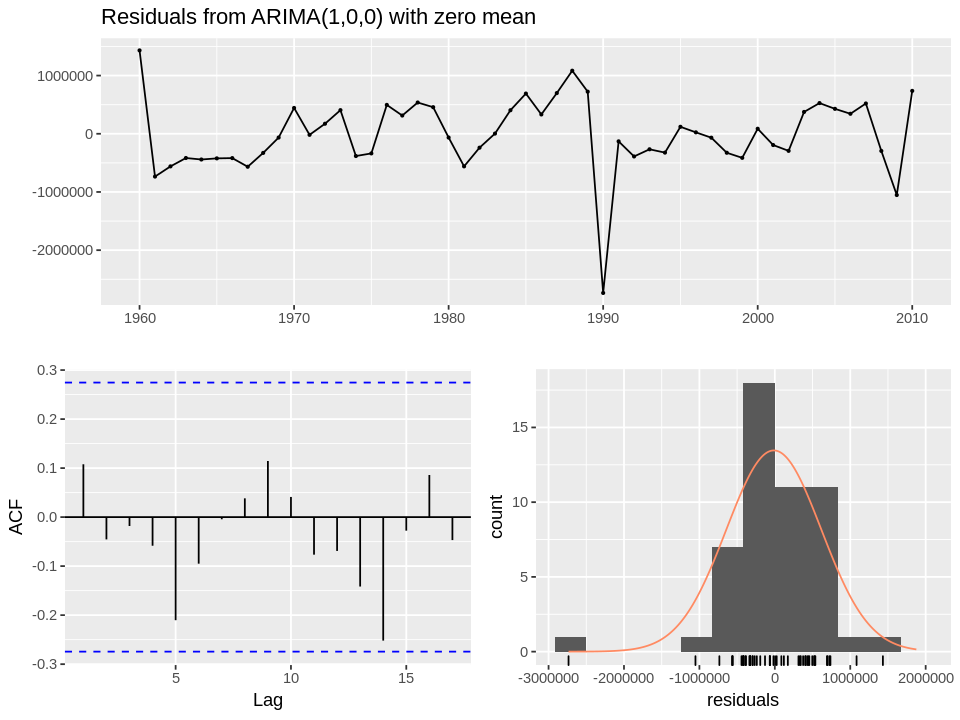

In [53]:
options(repr.plot.width=8, repr.plot.height=6)

print('AIC Modelo 3:')
AIC(fit_autorreg_cub_world)
print('BIC Modelo 3:')
BIC(fit_autorreg_cub_world)

checkresiduals(fit_autorreg_cub_world)

### Modelo 4

Seria interesante intentar ajustar un modelo Arima con diferenciación. Esto va a primero diferenciar la serie y quitarle la tendencia creciente

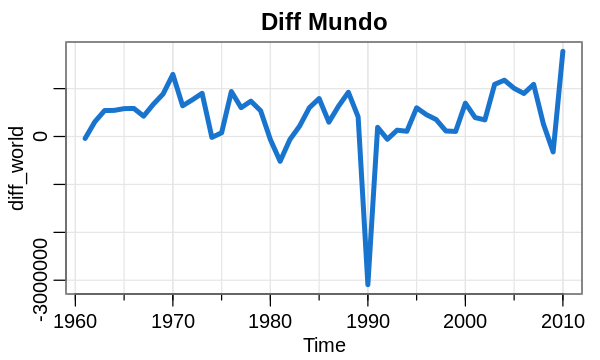

In [54]:
options(repr.plot.width=5, repr.plot.height=3)
diff_world = diff(world_ts)
tsplot(diff_world, col=4, lwd=4, main = 'Diff Mundo') # mas estacionaria

#### Ajuste ARIMA (1, 1, 0)

In [55]:
fit_arima_world_11 = Arima(world_ts, order = c(1,1,0))
fit_arima_world_11

Series: world_ts 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.4330
s.e.  0.1332

sigma^2 estimated as 524926965523:  log likelihood=-745.21
AIC=1494.42   AICc=1494.67   BIC=1498.24

#### Predicción Train-Test

In [56]:
pred = forecast(fit_arima_world_11, h = 10)

In [57]:
pred_media_model_4_11 = pred$mean
pred_lower_model_4_11 = pred$lower[,2]
pred_upper_model_4_11 = pred$upper[,2]

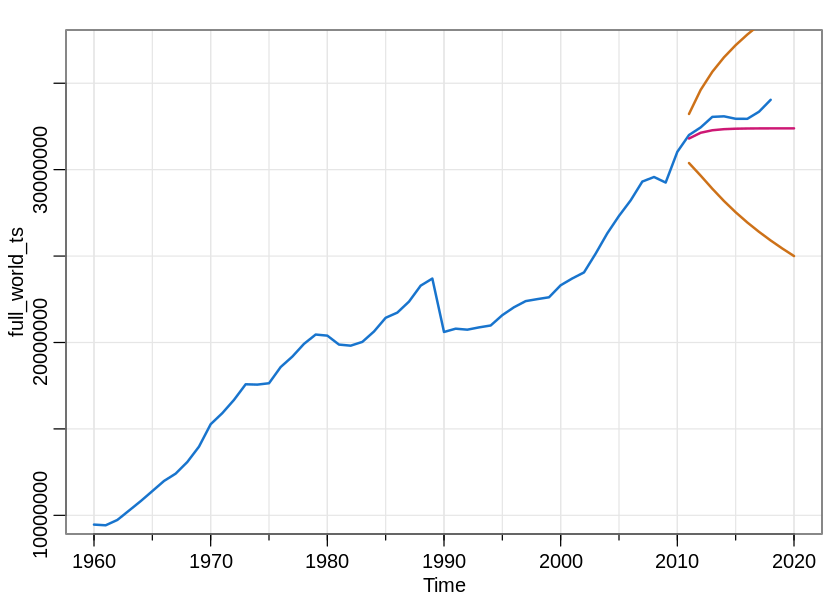

In [58]:
options(repr.plot.width=7, repr.plot.height=5)

tsplot(full_world_ts, c = 4, lw = 2, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(pred_media_model_4_11,col=6, lwd=2)
lines(pred_lower_model_4_11,col=7, lwd=2)
lines(pred_upper_model_4_11,col=7, lwd=2)

#### Residuos


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 5.9811, df = 9, p-value = 0.7418

Model df: 1.   Total lags used: 10



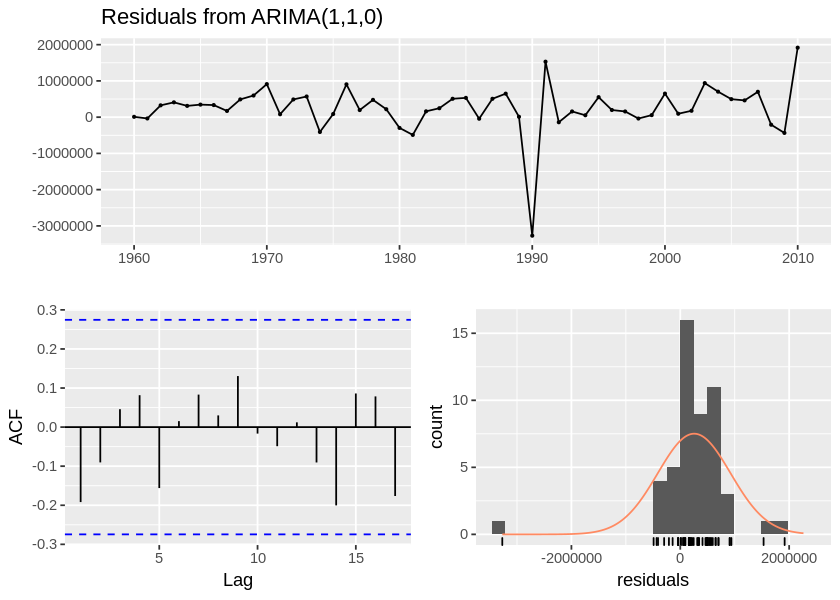

In [59]:
checkresiduals(fit_arima_world_11)

In [60]:
print('AIC Modelo 4 (1,1,0):')
AIC(fit_arima_world_11)
print('BIC Modelo 4 (1,1,0):')
BIC(fit_arima_world_11)

[1] "AIC Modelo 4 (1,1,0):"


[1] 1494.417

[1] "BIC Modelo 4 (1,1,0):"


[1] 1498.242

#### Ajuste ARIMA (1, 1, 1)

In [61]:
fit_arima_world_111 = Arima(world_ts, order = c(1,1,1))
fit_arima_world_111

Series: world_ts 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.9703  -0.8102
s.e.  0.0574   0.1573

sigma^2 estimated as 479976528930:  log likelihood=-742.76
AIC=1491.53   AICc=1492.05   BIC=1497.26

#### Predicción Train-Test

In [62]:
pred = forecast(fit_arima_world_111, h = 10)

In [63]:
pred_media_model_4_111 = pred$mean
pred_lower_model_4_111 = pred$lower[,2]
pred_upper_model_4_111 = pred$upper[,2]

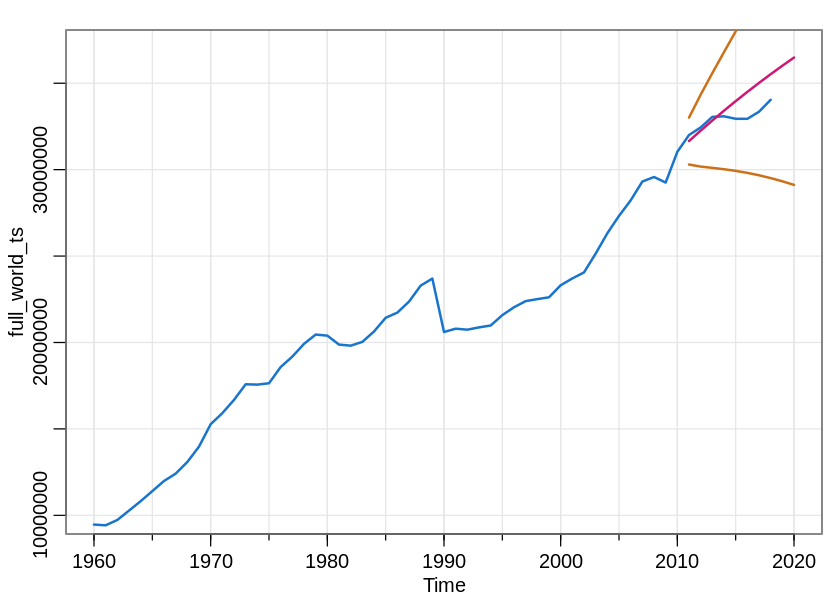

In [64]:
options(repr.plot.width=7, repr.plot.height=5)

tsplot(full_world_ts, c = 4, lw = 2, xlim = c(1960, 2020), ylim = c(10000000, 37000000))
lines(pred_media_model_4_111,col=6, lwd=2)
lines(pred_lower_model_4_111,col=7, lwd=2)
lines(pred_upper_model_4_111,col=7, lwd=2)

El modeol (1,1,1) parece seguir mejor la tendencia, pero tenemos grandes intervalos de confianza. Esto puede incidir en la precisión de la predicción.

#### Residuos


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 7.1074, df = 8, p-value = 0.5251

Model df: 2.   Total lags used: 10



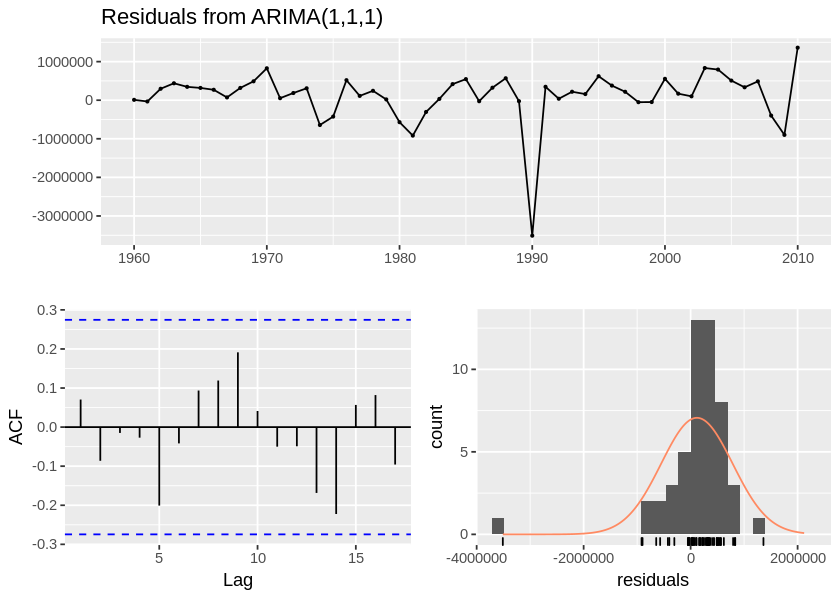

In [65]:
checkresiduals(fit_arima_world_111)

In [66]:
print('AIC Modelo 4 (1,1,1):')
AIC(fit_arima_world_111)
print('BIC Modelo 4 (1,1,1):')
BIC(fit_arima_world_111)

[1] "AIC Modelo 4 (1,1,1):"


[1] 1491.526

[1] "BIC Modelo 4 (1,1,1):"


[1] 1497.262

### Comparación entre Modelos

In [67]:
print('AIC y BIC:')

print('Modelo 1:')
AIC(fit_autorreg_line_world)
BIC(fit_autorreg_line_world)

print('Modelo 2:')
AIC(fit_autorreg_cuad_world)
BIC(fit_autorreg_cuad_world)

print('Modelo 3:')
AIC(fit_autorreg_cub_world)
BIC(fit_autorreg_cub_world)

print('Modelo 4 (1,1,0):')
AIC(fit_arima_world_11)
BIC(fit_arima_world_11)

print('Modelo 4 (1,1,1):')
AIC(fit_arima_world_111)
BIC(fit_arima_world_111)

[1] "AIC y BIC:"
[1] "Modelo 1:"


[1] 1511.407

[1] 1515.27

[1] "Modelo 2:"


[1] 1501.246

[1] 1505.11

[1] "Modelo 3:"


[1] 1510.8

[1] 1514.664

[1] "Modelo 4 (1,1,0):"


[1] 1494.417

[1] 1498.242

[1] "Modelo 4 (1,1,1):"


[1] 1491.526

[1] 1497.262

Zoom a las gráficas para apreciar mejor la predicción de los modelos:

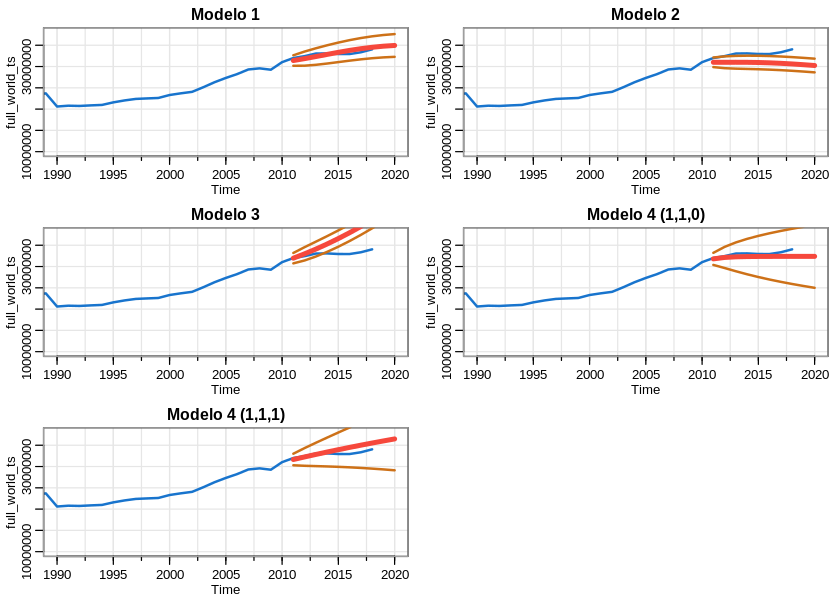

In [68]:
par(mfrow=c(3,2))

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1990, 2020), ylim = c(10000000, 38000000), main = 'Modelo 1')
lines(pred_media_model_1, lwd=4, col=2)
lines(pred_lower_model_1, col=7, lwd=2)
lines(pred_upper_model_1, col=7, lwd=2)

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1990, 2020), ylim = c(10000000, 38000000), main = 'Modelo 2')
lines(pred_media_model_2, lwd=4, col=2)
lines(pred_lower_model_2, col=7, lwd=2)
lines(pred_upper_model_2, col=7, lwd=2)

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1990, 2020), ylim = c(10000000, 38000000), main = 'Modelo 3')
lines(pred_media_model_3, lwd=4, col=2)
lines(pred_lower_model_3, col=7, lwd=2)
lines(pred_upper_model_3, col=7, lwd=2)

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1990, 2020), ylim = c(10000000, 38000000), main = 'Modelo 4 (1,1,0)')
lines(pred_media_model_4_11, lwd=4, col=2)
lines(pred_lower_model_4_11, col=7, lwd=2)
lines(pred_upper_model_4_11, col=7, lwd=2)

tsplot(full_world_ts, lwd=2, col=4, xlim = c(1990, 2020), ylim = c(10000000, 38000000), main = 'Modelo 4 (1,1,1)')
lines(pred_media_model_4_111, lwd=4, col=2)
lines(pred_lower_model_4_111, col=7, lwd=2)
lines(pred_upper_model_4_111, col=7, lwd=2)

Todos los residuos obtenidos fueron ruido blanco. COmpoarando los AIC y BIC de los modelos, no se perciben grandes diferencias.

A la hora de graficar la predicción y compararla con nuestros datos de test, es posible ver que los modelos mas ajustados parecen ser el Modelo 1 y el Modelo 4 (1,1,1). Teniendo en cuenta la cantidad de parametros uno podria inclinarse por el modelo 4, pero teniendo en cuenta la amplitud de los intervalos de confianza, hay argumentos a favor del modelo 1.

La decisión final va a estar en función de la situación y el problema a resolver. Va a haber que decidir si es mas conveniente tener mas seguridad en la predicción o un modelo mas simple.

## Relación Entre Incendios en Brasil y CO2

Para estudiar la relación entre los incendio y el CO2, primero cargamos los datos de incendios en el amazonas de 1998 a 2016.

In [69]:
amazon_fires_data = read.csv2('./data/amazonas_fires.csv', header = TRUE, sep = ',', dec = '.')
head(amazon_fires_data)
fires_month = amazon_fires_data$number

year,state,month,number,date
<int>,<fct>,<fct>,<dbl>,<fct>
1998,Amazonas,Janeiro,0,1998-01-01
1998,Amazonas,Fevereiro,0,1998-01-01
1998,Amazonas,Mar�o,0,1998-01-01
1998,Amazonas,Abril,0,1998-01-01
1998,Amazonas,Maio,0,1998-01-01
1998,Amazonas,Junho,2,1998-01-01


Y lo pasamos a una time series:

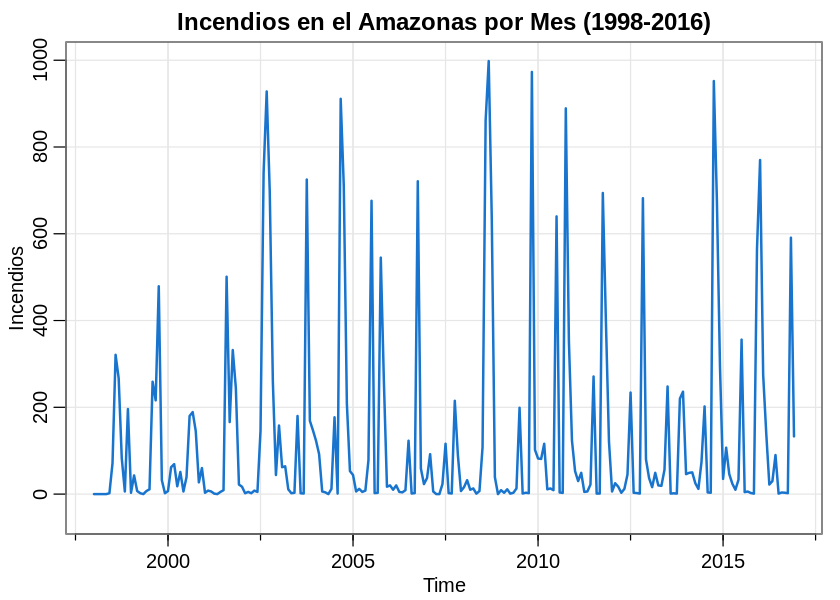

In [70]:
amazon_fires_ts = ts(fires_month, start = 1998, frequency = 12)
tsplot(
    amazon_fires_ts,
    lw = 2, 
    col = 4, 
    main='Incendios en el Amazonas por Mes (1998-2016)', 
    ylab='Incendios', 
    ylim = c(-50, 1000)
)

Como las series de CO2 tienen una frecuencia anual, pasamos la serie anterior a una frecuencia anual tambien:

In [71]:
# Pasar la serie a una frecuencia anual
amazon_fires_ts = aggregate(amazon_fires_ts, nfrequency=1, FUN=sum)

Como la serie de incendios va de 1998 a 2016, necesitamos tomar solo esos valores de nuestras series de CO2:

In [72]:
br_ts_same_years = tail(full_br_ts, 19)
world_ts_same_years = tail(full_world_ts, 19)

Vamos a ver si diferencias en CO2 inciden en los incendios:

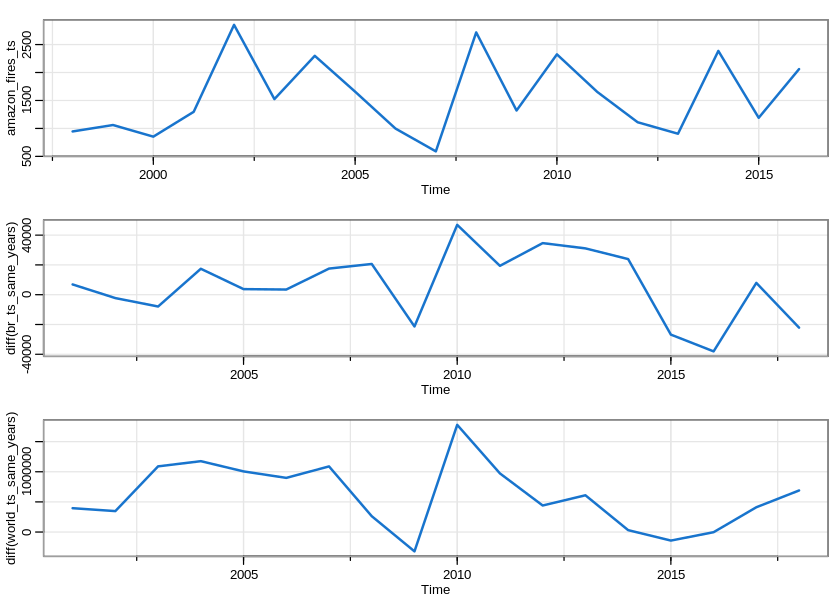

In [73]:
par(mfrow=c(3,1))

tsplot(amazon_fires_ts, lw = 2, c = 4)
tsplot(diff(br_ts_same_years), lw = 2, c = 4)
tsplot(diff(world_ts_same_years), lw = 2, c = 4)

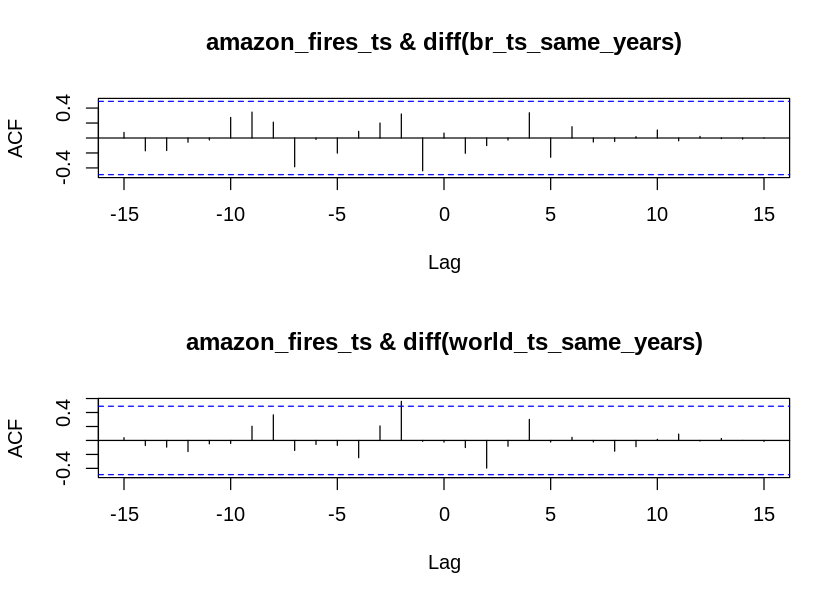

In [74]:
par(mfrow=c(2,1))

ccf(amazon_fires_ts, diff(br_ts_same_years), 25)
ccf(amazon_fires_ts, diff(world_ts_same_years), 25)

No parece haber mucha correlación cruzada entre las series. Esto puede deberse tambien a la poca cantidad de datos utilizados. De todas formas, la única correlación no despreciable se da en la diff de world CO2 y los incendios. Se lee la serie de incendios anticipa a la serie de CO2.

La correlacion minima es positiva 2 años anterior. Esto quiere decir que si hay mas incendios se va a haber un incremento en el CO2 mundial a los 2 años.

Podemos predecir esto con la información de incendios?

In [75]:
data = ts.intersect(diff(world_ts_same_years), amaL2=stats::lag(amazon_fires_ts, -2), dframe=TRUE)

Ajuste de incendios lageados 2 años con la diff de CO2 mundial:

In [76]:
fit = lm(diff(world_ts_same_years)~amaL2, data=data, na.action=NULL)
summary(fit)


Call:
lm(formula = diff(world_ts_same_years) ~ amaL2, data = data, 
    na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-968679 -281815  -10406  359538  656366 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -156638.3   274653.3  -0.570  0.57639   
amaL2           470.5      158.5   2.968  0.00907 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 447300 on 16 degrees of freedom
Multiple R-squared:  0.3551,	Adjusted R-squared:  0.3148 
F-statistic: 8.809 on 1 and 16 DF,  p-value: 0.009065


Gráfica de ajuste:

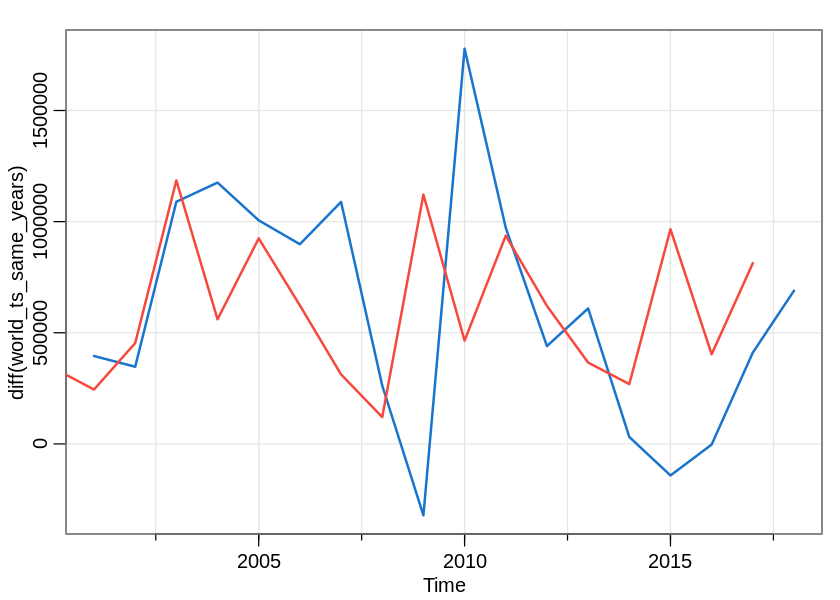

In [77]:
predictions = ts(fitted(fit), start=2000, frequency=1)
tsplot(diff(world_ts_same_years), col=4, lwd=2)
lines(predictions, col=2, lwd=2)

El residuo es ruido blanco:

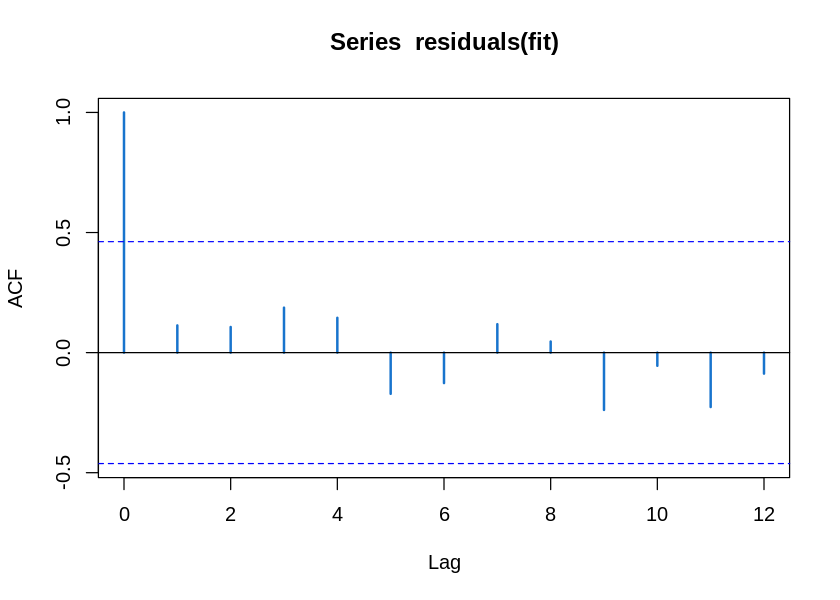

In [78]:
acf(residuals(fit), col=4, lwd=2)

Como conclusión podemos ver cierta correlación pero no es muy significativa. La predicción sigue tendencias pero no es una buena predicción. 

Sin embargo puede haber correlación. Los pasos a seguir serian repetir estos mismos pasos con una serie de incendios con mas años o una serie de CO2 mundial muestreada por meses y no por años.